In [270]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Loading Data
property_assessments = pd.read_csv('allegney_county_assesment.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (19,20,29,30,37,38,46,57,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Helper Functions

#Detect if NAN
def isNaN(num):
    return num != num

#One-Hot encode
def col_split(column):
    '''column = (pandas.Series) column of dataframe that we wish to split. Returns pandas.DataFrame with split columns.'''
    
    try:
        #Defining a Dictionary with all possible values as keys
        temp_dict = {}
        for element in column.unique():
            temp_dict[str(element)] = np.linspace(0,0,len(column))
    except AttributeError:
        print('Make sure you are passing in a Pandas Series (One Column)!')
        return
        
    #Sorting all observations
    for i in range(len(column)):
        temp_dict[str(column.iloc[i])][i] = 1              
    
    #Defining new Pandas DataFrame
    df = pd.DataFrame(temp_dict,columns=temp_dict.keys())
    
    #Returning Dataframe
    return df

def col_bool(column):
    '''column = (pandas.Series) column of dataframe that we wish to split. Returns pandas.DataFrame with binary column.'''
    
    #Length of column
    l = len(column)
    
    #Generating List 
    temp_list = np.linspace(0,0,l)
    for i in range(len(column)):
        if isNaN(column.iloc[i]) == False:
            temp_list[i] = 1
    return pd.DataFrame(temp_list,columns=[column.name])

#Calculate Percentage of Each Value Present in Column
def col_dist(df,column_name):
    '''df = (pandas.DataFrame) data dataframe for all data
       column_name = (str) name of column that we want the distribution from.'''
    print('Unique Values : ', np.sort(df[column_name].unique().astype(str)))
    l = len(df)
    try:
        temp = df.groupby(by = column_name)[column_name].count().sort_index()
    except TypeError:
        temp = df.groupby(by = column_name)[column_name].count()
    print('\nCount of Values w/o nan : ', temp)
    for i in range(len(temp)):
        print('\nValue {} Percentage = {}%'.format(i, round(list(temp)[i]/l*100,3)))
    return

---

# Allegney County Property Assessment Data Cleaning and EDA

*The purpose of this jupyter notebook is to document and clean features within the dataset.  Cleaning is undertaken with no model selection in mind, thus no preprocessing steps are taken.*

### Vocab

**Parcel** - is an identification for taxation purposes for a property. [Ref](https://www.landwatch.org/pages/publications02/roomenough/legal.html)

**Lot** - is a recognized subdivision of property with a written legal description that addresses permissions or constraints upon its development. [Ref](https://www.landwatch.org/pages/publications02/roomenough/legal.html)

---

## Financial Features EDA and Cleaning

> **TAXCODE**
>> Tax Status indicates whether or not real estate taxes apply to a parcel's assessment.   Parcels may be Taxable (must pay local taxes), Exempt (pay no taxes), or PURTA [Public Utility Realty Tax Act (if taxes are paid, they are paid into a state fund rather than to local taxing bodies)].
Values:  'E' , 'T' or 'P' .

Further Information:

- 'E' denotes a Parcel as Tax Exempt.

- 'T' denotes a Parcel as Taxable (pays local taxes)

- 'P' denotes a Parcel as Public Utility Realty Tax [Ref](https://www.google.com/search?q=Public+Utility+Realty+Tax+Act&rlz=1C1CHBF_enUS867US867&oq=Public+&aqs=chrome.0.69i59j69i57j69i59j69i61j69i60j69i61j69i60l2.1375j0j7&sourceid=chrome&ie=UTF-8).

In [5]:
#One-Hot Encoding TAXCODE
taxcode_df = col_split(property_assessments['TAXCODE'])
taxcode_df.head(5)

,T,E,P
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


---

> **TAXSUBCODE**
>> Tax Sub Code applies only to parcels having the PURTA tax status.  Public Utilities may not have to pay taxes (E-Exempt) or they may have to pay taxes into a state fund (T-Taxable). 

In [6]:
#EDA on TAXSUBCODE
col_dist(property_assessments,'TAXSUBCODE')

Unique Values :  ['E' 'T' 'nan']

Count of Values w/o nan :  TAXSUBCODE
E     680
T    1032
Name: TAXSUBCODE, dtype: int64

Value 0 Percentage = 0.117%

Value 1 Percentage = 0.178%


Based on Percentages we can probably ignore this feature.

---

> **HOMESTEADFLAG**
>> A property owner may apply for a homestead reduction on their primary residence.  If granted (indicated by 'HOM') the owner will receive a standard reduction on their assessment for County taxes under Act 50.  They may also receive a variable reduction on their School taxes under Act 1.

In [7]:
#EDA on HOMESTEADFLAG
col_dist(property_assessments,'HOMESTEADFLAG')

Unique Values :  ['HOM' 'nan']

Count of Values w/o nan :  HOMESTEADFLAG
HOM    305389
Name: HOMESTEADFLAG, dtype: int64

Value 0 Percentage = 52.606%


In [8]:
#Creating Homesteadflag dataframe
Homesteadflag_df = col_bool(property_assessments['HOMESTEADFLAG'])
Homesteadflag_df.head(5)

,HOMESTEADFLAG
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


---

> **CLEANGREEN**
>> This field indicates that a parcel is receiving a reduction in their assessment due to the state’s Clean and Green preferential assessment program.

In [9]:
#EDA on CLEANGREEN
col_dist(property_assessments,'CLEANGREEN')

Unique Values :  ['Y' 'nan']

Count of Values w/o nan :  CLEANGREEN
Y    1686
Name: CLEANGREEN, dtype: int64

Value 0 Percentage = 0.29%


In [10]:
#Creating Cleangreen dataframe
Cleangreen_df = col_bool(property_assessments['CLEANGREEN'])
Cleangreen_df.head(5)

,CLEANGREEN
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


---

> **FARMSTEAD**
>> A property owner may apply for a farmstead reduction if their primary residence is a farm with at least 10 contiguous acres.  If granted (indicated by 'FRM') the owner will receive a standard reduction on their assessment for County taxes under Act 50.

In [11]:
#EDA on FARMSTEAD
col_dist(property_assessments,'FARMSTEADFLAG')

Unique Values :  ['FRM' 'nan']

Count of Values w/o nan :  FARMSTEADFLAG
FRM    6
Name: FARMSTEADFLAG, dtype: int64

Value 0 Percentage = 0.001%


In [12]:
#Creating Farmstead Dataframe
Farmstead_df = col_bool(property_assessments['FARMSTEADFLAG'])
Farmstead_df.head(5)

,FARMSTEADFLAG
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


---

> **ABATEMENT**
>> "This field indicates that a parcel is receiving a reduction in their County assessment due to a County-approved incentive program.   Specific programs and amounts vary according to the County resolutions and ordinances in effect at the time.  Consult the Office of Property Assessments web page to see the current types of Abatements.

>> Abatements have been available to residential property owners as incentives for new construction and for building improvements.  Abatements for commercial properties have been available for local economic revitalization programs.


In [13]:
#EDA on Abatement
col_dist(property_assessments,'ABATEMENTFLAG')

Unique Values :  ['Y' 'nan']

Count of Values w/o nan :  ABATEMENTFLAG
Y    582
Name: ABATEMENTFLAG, dtype: int64

Value 0 Percentage = 0.1%


In [14]:
#Creating Abatement Dataframe
Abatement_df = col_bool(property_assessments['ABATEMENTFLAG'])
Abatement_df.head(5)

,ABATEMENTFLAG
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


---

> **SALEPRICE**
>> "Amount paid for the sale 
(also called the consideration)."

Percentage of unique = 5.83%


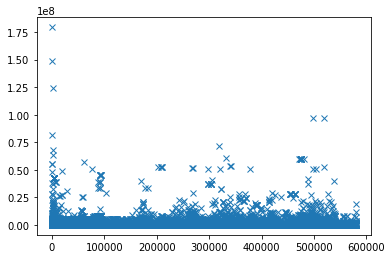

In [15]:
#EDA on Salerprice
plt.plot(np.linspace(0,len(property_assessments)-1,len(property_assessments)),property_assessments['SALEPRICE'],'x')
print('Percentage of unique = {}%'.format(round((len(property_assessments['SALEPRICE'].unique())*100)/len(property_assessments),2)))

---

> **SALECODE**
>> A subjective categorization (code) as to whether or not the sale price was representative of current market value. These categorizations are subject to change as sales are reviewed by the Office of Property Assessments or during a reassessment. See further details in the Sale Validation Codes Details tab of the "Property Sale Transaction Data Dictionary".  

In [16]:
#EDA on Salecode - Values of '0', 'UR', and 'U' refer to a valid sale [Valid_Count = 13161]
col_dist(property_assessments,'SALECODE')

Unique Values :  [' U' '0' '0N' '0X' '1' '13' '14' '16' '19' '2' '21' '24' '25' '27' '28'
 '29' '3' '32' '33' '34' '35' '36' '37' '4' '5' '50' '5N' '5V' '5n' '5v'
 '6' '7' '8' '9' '99' 'AA' 'AE' 'AG' 'BK' 'DT' 'EV' 'EZ' 'FA' 'FG' 'FQ'
 'GQ' 'GV' 'H' 'HJ' 'IF' 'IH' 'IN' 'IP' 'N' 'ND' 'O' 'PA' 'PV' 'PX' 'Q'
 'QQ' 'R' 'S' 'U' 'UN' 'UR' 'UX' 'V' 'VB' 'VH' 'WX' 'X' 'XX' 'YY' 'Z' 'a'
 'h' 'n' 'nan' 's' 'u' 'z']

Count of Values w/o nan :  SALECODE
 U         1
0     131161
0N         8
0X        70
1       4923
13      1255
14     14940
16      2884
19       345
2       3433
21      1765
24       491
25        23
27      1951
28      2258
29       288
3     133338
32        96
33      2321
34       180
35      1732
36     31409
37      1729
4      11844
5        957
50       364
5N       299
5V       617
5n         1
5v         1
       ...  
IN         5
IP         9
N      37878
ND       336
O          4
PA       154
PV        18
PX         2
Q         28
QQ         3
R          1
S       

Now we can filter only the valid sales from the dataset, and re-look at sales price:

In [17]:
#Selecting Only Valid Sales Indexes
valid_indicies = list()
for i in range(len(property_assessments)):
    if str(property_assessments['SALECODE'].iloc[i]).strip().capitalize() == '0' or \
    str(property_assessments['SALECODE'].iloc[i]).strip().capitalize() =='U' or \
    str(property_assessments['SALECODE'].iloc[i]).strip().capitalize() =='UR':
        valid_indicies.append(i)

In [18]:
print('There are {} detected valid sales.'.format(len(valid_indicies)))

There are 159407 detected valid sales.


In [19]:
#Declaring new datasource - We can use 'valid_indicies' to correct all other dataframes later.
valid_property_assessments = property_assessments.iloc[valid_indicies]
valid_property_assessments.head(5)

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,MUNIDESC,...,HALFBATHS,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,ALT_ID,TAXYEAR,ASOFDATE
2,0001G00224040100,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 401,15222.0,101,1st Ward - PITTSBURGH,...,0.0,B,Central Heat with AC,NaN,NaN,1520.0,1.0,NaN,2020,1-Apr-20
11,0001G00224110200,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 1102,15222.0,101,1st Ward - PITTSBURGH,...,1.0,B,Central Heat with AC,NaN,NaN,1315.0,1.0,NaN,2020,1-Apr-20
13,0001D00115000000,500.0,,LIBERTY AVE,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1-Apr-20
17,0001D00130000000,26.0,,MARKET SQ,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1-Apr-20
21,0001D00144000000,431.0,,MARKET ST,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1-Apr-20


In [20]:
#Redoing EDA on Saleprice
col_dist(valid_property_assessments,'SALEPRICE')

Unique Values :  ['0.0' '1.0' '10.0' ... '999900.0' '99999.0' 'nan']

Count of Values w/o nan :  SALEPRICE
0.0            57
1.0            23
10.0            5
23.0            1
100.0           6
101.0           1
107.0           1
200.0          12
214.0           1
250.0           1
300.0           9
325.0           3
330.0           1
350.0           6
400.0           5
500.0          29
530.0           1
535.0           1
550.0           1
575.0           1
600.0           4
674.0           1
697.0           1
698.0           1
700.0           3
742.0           1
750.0           3
800.0           4
847.0           1
880.0           1
               ..
8250000.0       1
8293000.0       1
8300000.0       1
8400000.0       1
8500000.0       1
8600000.0       1
9075000.0       1
9500000.0       1
9928300.0       1
9990000.0       1
10000000.0      1
10433000.0      1
10575000.0      1
11460000.0      1
12000000.0      1
12657720.0      1
13264600.0      1
16150000.0      1
16489052.0 

Value 474 Percentage = 0.001%

Value 475 Percentage = 0.001%

Value 476 Percentage = 0.001%

Value 477 Percentage = 0.001%

Value 478 Percentage = 0.002%

Value 479 Percentage = 0.008%

Value 480 Percentage = 0.001%

Value 481 Percentage = 0.001%

Value 482 Percentage = 0.001%

Value 483 Percentage = 0.001%

Value 484 Percentage = 0.007%

Value 485 Percentage = 0.001%

Value 486 Percentage = 0.001%

Value 487 Percentage = 0.003%

Value 488 Percentage = 0.003%

Value 489 Percentage = 0.001%

Value 490 Percentage = 0.001%

Value 491 Percentage = 0.001%

Value 492 Percentage = 0.002%

Value 493 Percentage = 0.001%

Value 494 Percentage = 0.075%

Value 495 Percentage = 0.001%

Value 496 Percentage = 0.001%

Value 497 Percentage = 0.001%

Value 498 Percentage = 0.004%

Value 499 Percentage = 0.001%

Value 500 Percentage = 0.003%

Value 501 Percentage = 0.001%

Value 502 Percentage = 0.001%

Value 503 Percentage = 0.001%

Value 504 Percentage = 0.001%

Value 505 Percentage = 0.001%

Value 50


Value 794 Percentage = 0.001%

Value 795 Percentage = 0.003%

Value 796 Percentage = 0.001%

Value 797 Percentage = 0.006%

Value 798 Percentage = 0.001%

Value 799 Percentage = 0.001%

Value 800 Percentage = 0.001%

Value 801 Percentage = 0.001%

Value 802 Percentage = 0.001%

Value 803 Percentage = 0.001%

Value 804 Percentage = 0.129%

Value 805 Percentage = 0.001%

Value 806 Percentage = 0.001%

Value 807 Percentage = 0.004%

Value 808 Percentage = 0.005%

Value 809 Percentage = 0.001%

Value 810 Percentage = 0.006%

Value 811 Percentage = 0.001%

Value 812 Percentage = 0.001%

Value 813 Percentage = 0.008%

Value 814 Percentage = 0.001%

Value 815 Percentage = 0.001%

Value 816 Percentage = 0.04%

Value 817 Percentage = 0.001%

Value 818 Percentage = 0.001%

Value 819 Percentage = 0.001%

Value 820 Percentage = 0.001%

Value 821 Percentage = 0.179%

Value 822 Percentage = 0.001%

Value 823 Percentage = 0.001%

Value 824 Percentage = 0.001%

Value 825 Percentage = 0.001%

Value 82


Value 1071 Percentage = 0.001%

Value 1072 Percentage = 0.001%

Value 1073 Percentage = 0.064%

Value 1074 Percentage = 0.001%

Value 1075 Percentage = 0.706%

Value 1076 Percentage = 0.001%

Value 1077 Percentage = 0.001%

Value 1078 Percentage = 0.001%

Value 1079 Percentage = 0.001%

Value 1080 Percentage = 0.001%

Value 1081 Percentage = 0.003%

Value 1082 Percentage = 0.001%

Value 1083 Percentage = 0.001%

Value 1084 Percentage = 0.001%

Value 1085 Percentage = 0.001%

Value 1086 Percentage = 0.001%

Value 1087 Percentage = 0.001%

Value 1088 Percentage = 0.001%

Value 1089 Percentage = 0.006%

Value 1090 Percentage = 0.003%

Value 1091 Percentage = 0.001%

Value 1092 Percentage = 0.001%

Value 1093 Percentage = 0.003%

Value 1094 Percentage = 0.001%

Value 1095 Percentage = 0.001%

Value 1096 Percentage = 0.001%

Value 1097 Percentage = 0.001%

Value 1098 Percentage = 0.001%

Value 1099 Percentage = 0.003%

Value 1100 Percentage = 0.001%

Value 1101 Percentage = 0.001%

Value 1


Value 1606 Percentage = 0.001%

Value 1607 Percentage = 0.004%

Value 1608 Percentage = 0.003%

Value 1609 Percentage = 0.008%

Value 1610 Percentage = 0.001%

Value 1611 Percentage = 0.001%

Value 1612 Percentage = 0.001%

Value 1613 Percentage = 0.001%

Value 1614 Percentage = 0.153%

Value 1615 Percentage = 0.001%

Value 1616 Percentage = 0.001%

Value 1617 Percentage = 0.003%

Value 1618 Percentage = 0.006%

Value 1619 Percentage = 0.001%

Value 1620 Percentage = 0.001%

Value 1621 Percentage = 0.004%

Value 1622 Percentage = 0.001%

Value 1623 Percentage = 0.001%

Value 1624 Percentage = 0.006%

Value 1625 Percentage = 0.001%

Value 1626 Percentage = 0.001%

Value 1627 Percentage = 0.001%

Value 1628 Percentage = 0.001%

Value 1629 Percentage = 0.048%

Value 1630 Percentage = 0.001%

Value 1631 Percentage = 0.001%

Value 1632 Percentage = 0.001%

Value 1633 Percentage = 0.001%

Value 1634 Percentage = 0.3%

Value 1635 Percentage = 0.001%

Value 1636 Percentage = 0.001%

Value 163

Value 1901 Percentage = 0.001%

Value 1902 Percentage = 0.001%

Value 1903 Percentage = 0.001%

Value 1904 Percentage = 0.139%

Value 1905 Percentage = 0.001%

Value 1906 Percentage = 0.001%

Value 1907 Percentage = 0.001%

Value 1908 Percentage = 0.006%

Value 1909 Percentage = 0.001%

Value 1910 Percentage = 0.001%

Value 1911 Percentage = 0.001%

Value 1912 Percentage = 0.007%

Value 1913 Percentage = 0.004%

Value 1914 Percentage = 0.001%

Value 1915 Percentage = 0.007%

Value 1916 Percentage = 0.001%

Value 1917 Percentage = 0.001%

Value 1918 Percentage = 0.001%

Value 1919 Percentage = 0.001%

Value 1920 Percentage = 0.047%

Value 1921 Percentage = 0.001%

Value 1922 Percentage = 0.392%

Value 1923 Percentage = 0.001%

Value 1924 Percentage = 0.001%

Value 1925 Percentage = 0.001%

Value 1926 Percentage = 0.003%

Value 1927 Percentage = 0.001%

Value 1928 Percentage = 0.001%

Value 1929 Percentage = 0.002%

Value 1930 Percentage = 0.001%

Value 1931 Percentage = 0.001%

Value 19

Value 2235 Percentage = 0.002%

Value 2236 Percentage = 0.001%

Value 2237 Percentage = 0.001%

Value 2238 Percentage = 0.11%

Value 2239 Percentage = 0.001%

Value 2240 Percentage = 0.001%

Value 2241 Percentage = 0.001%

Value 2242 Percentage = 0.001%

Value 2243 Percentage = 0.006%

Value 2244 Percentage = 0.001%

Value 2245 Percentage = 0.001%

Value 2246 Percentage = 0.001%

Value 2247 Percentage = 0.008%

Value 2248 Percentage = 0.001%

Value 2249 Percentage = 0.002%

Value 2250 Percentage = 0.004%

Value 2251 Percentage = 0.001%

Value 2252 Percentage = 0.001%

Value 2253 Percentage = 0.111%

Value 2254 Percentage = 0.001%

Value 2255 Percentage = 0.001%

Value 2256 Percentage = 0.003%

Value 2257 Percentage = 0.001%

Value 2258 Percentage = 0.88%

Value 2259 Percentage = 0.001%

Value 2260 Percentage = 0.001%

Value 2261 Percentage = 0.005%

Value 2262 Percentage = 0.001%

Value 2263 Percentage = 0.001%

Value 2264 Percentage = 0.002%

Value 2265 Percentage = 0.008%

Value 2266

Value 2533 Percentage = 0.001%

Value 2534 Percentage = 0.001%

Value 2535 Percentage = 0.023%

Value 2536 Percentage = 0.001%

Value 2537 Percentage = 0.001%

Value 2538 Percentage = 0.001%

Value 2539 Percentage = 0.001%

Value 2540 Percentage = 0.26%

Value 2541 Percentage = 0.001%

Value 2542 Percentage = 0.001%

Value 2543 Percentage = 0.001%

Value 2544 Percentage = 0.001%

Value 2545 Percentage = 0.003%

Value 2546 Percentage = 0.001%

Value 2547 Percentage = 0.001%

Value 2548 Percentage = 0.001%

Value 2549 Percentage = 0.001%

Value 2550 Percentage = 0.001%

Value 2551 Percentage = 0.001%

Value 2552 Percentage = 0.001%

Value 2553 Percentage = 0.005%

Value 2554 Percentage = 0.001%

Value 2555 Percentage = 0.004%

Value 2556 Percentage = 0.001%

Value 2557 Percentage = 0.001%

Value 2558 Percentage = 0.001%

Value 2559 Percentage = 0.004%

Value 2560 Percentage = 0.001%

Value 2561 Percentage = 0.001%

Value 2562 Percentage = 0.001%

Value 2563 Percentage = 0.004%

Value 256


Value 2791 Percentage = 0.009%

Value 2792 Percentage = 0.363%

Value 2793 Percentage = 0.001%

Value 2794 Percentage = 0.001%

Value 2795 Percentage = 0.001%

Value 2796 Percentage = 0.005%

Value 2797 Percentage = 0.001%

Value 2798 Percentage = 0.001%

Value 2799 Percentage = 0.004%

Value 2800 Percentage = 0.001%

Value 2801 Percentage = 0.003%

Value 2802 Percentage = 0.001%

Value 2803 Percentage = 0.004%

Value 2804 Percentage = 0.001%

Value 2805 Percentage = 0.001%

Value 2806 Percentage = 0.007%

Value 2807 Percentage = 0.001%

Value 2808 Percentage = 0.001%

Value 2809 Percentage = 0.002%

Value 2810 Percentage = 0.001%

Value 2811 Percentage = 0.001%

Value 2812 Percentage = 0.178%

Value 2813 Percentage = 0.001%

Value 2814 Percentage = 0.001%

Value 2815 Percentage = 0.001%

Value 2816 Percentage = 0.004%

Value 2817 Percentage = 0.001%

Value 2818 Percentage = 0.001%

Value 2819 Percentage = 0.001%

Value 2820 Percentage = 0.008%

Value 2821 Percentage = 0.001%

Value 2

Value 3203 Percentage = 0.001%

Value 3204 Percentage = 0.007%

Value 3205 Percentage = 0.001%

Value 3206 Percentage = 0.004%

Value 3207 Percentage = 0.001%

Value 3208 Percentage = 0.001%

Value 3209 Percentage = 0.001%

Value 3210 Percentage = 0.006%

Value 3211 Percentage = 0.001%

Value 3212 Percentage = 0.001%

Value 3213 Percentage = 0.001%

Value 3214 Percentage = 0.001%

Value 3215 Percentage = 0.001%

Value 3216 Percentage = 0.157%

Value 3217 Percentage = 0.001%

Value 3218 Percentage = 0.001%

Value 3219 Percentage = 0.003%

Value 3220 Percentage = 0.001%

Value 3221 Percentage = 0.001%

Value 3222 Percentage = 0.001%

Value 3223 Percentage = 0.001%

Value 3224 Percentage = 0.006%

Value 3225 Percentage = 0.001%

Value 3226 Percentage = 0.004%

Value 3227 Percentage = 0.002%

Value 3228 Percentage = 0.003%

Value 3229 Percentage = 0.001%

Value 3230 Percentage = 0.001%

Value 3231 Percentage = 0.001%

Value 3232 Percentage = 0.043%

Value 3233 Percentage = 0.001%

Value 32


Value 3531 Percentage = 0.009%

Value 3532 Percentage = 0.001%

Value 3533 Percentage = 0.121%

Value 3534 Percentage = 0.001%

Value 3535 Percentage = 0.001%

Value 3536 Percentage = 0.749%

Value 3537 Percentage = 0.001%

Value 3538 Percentage = 0.001%

Value 3539 Percentage = 0.001%

Value 3540 Percentage = 0.003%

Value 3541 Percentage = 0.001%

Value 3542 Percentage = 0.001%

Value 3543 Percentage = 0.001%

Value 3544 Percentage = 0.009%

Value 3545 Percentage = 0.001%

Value 3546 Percentage = 0.003%

Value 3547 Percentage = 0.004%

Value 3548 Percentage = 0.001%

Value 3549 Percentage = 0.001%

Value 3550 Percentage = 0.001%

Value 3551 Percentage = 0.001%

Value 3552 Percentage = 0.001%

Value 3553 Percentage = 0.001%

Value 3554 Percentage = 0.006%

Value 3555 Percentage = 0.001%

Value 3556 Percentage = 0.001%

Value 3557 Percentage = 0.103%

Value 3558 Percentage = 0.001%

Value 3559 Percentage = 0.001%

Value 3560 Percentage = 0.001%

Value 3561 Percentage = 0.001%

Value 3


Value 3901 Percentage = 0.001%

Value 3902 Percentage = 0.003%

Value 3903 Percentage = 0.001%

Value 3904 Percentage = 0.001%

Value 3905 Percentage = 0.001%

Value 3906 Percentage = 0.003%

Value 3907 Percentage = 0.001%

Value 3908 Percentage = 0.001%

Value 3909 Percentage = 0.065%

Value 3910 Percentage = 0.001%

Value 3911 Percentage = 0.001%

Value 3912 Percentage = 0.55%

Value 3913 Percentage = 0.001%

Value 3914 Percentage = 0.001%

Value 3915 Percentage = 0.004%

Value 3916 Percentage = 0.001%

Value 3917 Percentage = 0.001%

Value 3918 Percentage = 0.004%

Value 3919 Percentage = 0.001%

Value 3920 Percentage = 0.001%

Value 3921 Percentage = 0.001%

Value 3922 Percentage = 0.002%

Value 3923 Percentage = 0.001%

Value 3924 Percentage = 0.001%

Value 3925 Percentage = 0.001%

Value 3926 Percentage = 0.001%

Value 3927 Percentage = 0.001%

Value 3928 Percentage = 0.008%

Value 3929 Percentage = 0.001%

Value 3930 Percentage = 0.065%

Value 3931 Percentage = 0.001%

Value 39

Value 4232 Percentage = 0.001%

Value 4233 Percentage = 0.001%

Value 4234 Percentage = 0.001%

Value 4235 Percentage = 0.001%

Value 4236 Percentage = 0.003%

Value 4237 Percentage = 0.001%

Value 4238 Percentage = 0.001%

Value 4239 Percentage = 0.001%

Value 4240 Percentage = 0.001%

Value 4241 Percentage = 0.001%

Value 4242 Percentage = 0.001%

Value 4243 Percentage = 0.001%

Value 4244 Percentage = 0.001%

Value 4245 Percentage = 0.001%

Value 4246 Percentage = 0.001%

Value 4247 Percentage = 0.004%

Value 4248 Percentage = 0.001%

Value 4249 Percentage = 0.001%

Value 4250 Percentage = 0.001%

Value 4251 Percentage = 0.035%

Value 4252 Percentage = 0.001%

Value 4253 Percentage = 0.003%

Value 4254 Percentage = 0.001%

Value 4255 Percentage = 0.001%

Value 4256 Percentage = 0.001%

Value 4257 Percentage = 0.001%

Value 4258 Percentage = 0.001%

Value 4259 Percentage = 0.001%

Value 4260 Percentage = 0.001%

Value 4261 Percentage = 0.001%

Value 4262 Percentage = 0.001%

Value 42


Value 4551 Percentage = 0.003%

Value 4552 Percentage = 0.001%

Value 4553 Percentage = 0.001%

Value 4554 Percentage = 0.001%

Value 4555 Percentage = 0.002%

Value 4556 Percentage = 0.001%

Value 4557 Percentage = 0.001%

Value 4558 Percentage = 0.001%

Value 4559 Percentage = 0.053%

Value 4560 Percentage = 0.001%

Value 4561 Percentage = 0.001%

Value 4562 Percentage = 0.001%

Value 4563 Percentage = 0.001%

Value 4564 Percentage = 0.001%

Value 4565 Percentage = 0.001%

Value 4566 Percentage = 0.001%

Value 4567 Percentage = 0.001%

Value 4568 Percentage = 0.002%

Value 4569 Percentage = 0.003%

Value 4570 Percentage = 0.001%

Value 4571 Percentage = 0.029%

Value 4572 Percentage = 0.001%

Value 4573 Percentage = 0.001%

Value 4574 Percentage = 0.149%

Value 4575 Percentage = 0.001%

Value 4576 Percentage = 0.001%

Value 4577 Percentage = 0.003%

Value 4578 Percentage = 0.008%

Value 4579 Percentage = 0.001%

Value 4580 Percentage = 0.001%

Value 4581 Percentage = 0.001%

Value 4

Value 4817 Percentage = 0.001%

Value 4818 Percentage = 0.001%

Value 4819 Percentage = 0.051%

Value 4820 Percentage = 0.001%

Value 4821 Percentage = 0.001%

Value 4822 Percentage = 0.001%

Value 4823 Percentage = 0.008%

Value 4824 Percentage = 0.001%

Value 4825 Percentage = 0.001%

Value 4826 Percentage = 0.001%

Value 4827 Percentage = 0.004%

Value 4828 Percentage = 0.001%

Value 4829 Percentage = 0.001%

Value 4830 Percentage = 0.001%

Value 4831 Percentage = 0.004%

Value 4832 Percentage = 0.001%

Value 4833 Percentage = 0.003%

Value 4834 Percentage = 0.001%

Value 4835 Percentage = 0.001%

Value 4836 Percentage = 0.001%

Value 4837 Percentage = 0.02%

Value 4838 Percentage = 0.002%

Value 4839 Percentage = 0.001%

Value 4840 Percentage = 0.001%

Value 4841 Percentage = 0.159%

Value 4842 Percentage = 0.001%

Value 4843 Percentage = 0.001%

Value 4844 Percentage = 0.002%

Value 4845 Percentage = 0.001%

Value 4846 Percentage = 0.003%

Value 4847 Percentage = 0.001%

Value 484


Value 5098 Percentage = 0.004%

Value 5099 Percentage = 0.001%

Value 5100 Percentage = 0.004%

Value 5101 Percentage = 0.001%

Value 5102 Percentage = 0.001%

Value 5103 Percentage = 0.001%

Value 5104 Percentage = 0.001%

Value 5105 Percentage = 0.001%

Value 5106 Percentage = 0.001%

Value 5107 Percentage = 0.001%

Value 5108 Percentage = 0.043%

Value 5109 Percentage = 0.001%

Value 5110 Percentage = 0.001%

Value 5111 Percentage = 0.002%

Value 5112 Percentage = 0.001%

Value 5113 Percentage = 0.001%

Value 5114 Percentage = 0.006%

Value 5115 Percentage = 0.001%

Value 5116 Percentage = 0.001%

Value 5117 Percentage = 0.001%

Value 5118 Percentage = 0.003%

Value 5119 Percentage = 0.001%

Value 5120 Percentage = 0.016%

Value 5121 Percentage = 0.001%

Value 5122 Percentage = 0.001%

Value 5123 Percentage = 0.001%

Value 5124 Percentage = 0.001%

Value 5125 Percentage = 0.182%

Value 5126 Percentage = 0.001%

Value 5127 Percentage = 0.001%

Value 5128 Percentage = 0.001%

Value 5


Value 5368 Percentage = 0.003%

Value 5369 Percentage = 0.001%

Value 5370 Percentage = 0.001%

Value 5371 Percentage = 0.001%

Value 5372 Percentage = 0.001%

Value 5373 Percentage = 0.001%

Value 5374 Percentage = 0.003%

Value 5375 Percentage = 0.001%

Value 5376 Percentage = 0.001%

Value 5377 Percentage = 0.001%

Value 5378 Percentage = 0.037%

Value 5379 Percentage = 0.001%

Value 5380 Percentage = 0.001%

Value 5381 Percentage = 0.001%

Value 5382 Percentage = 0.001%

Value 5383 Percentage = 0.001%

Value 5384 Percentage = 0.004%

Value 5385 Percentage = 0.004%

Value 5386 Percentage = 0.001%

Value 5387 Percentage = 0.001%

Value 5388 Percentage = 0.001%

Value 5389 Percentage = 0.001%

Value 5390 Percentage = 0.134%

Value 5391 Percentage = 0.001%

Value 5392 Percentage = 0.001%

Value 5393 Percentage = 0.001%

Value 5394 Percentage = 0.001%

Value 5395 Percentage = 0.001%

Value 5396 Percentage = 0.001%

Value 5397 Percentage = 0.476%

Value 5398 Percentage = 0.001%

Value 5

Value 5691 Percentage = 0.001%

Value 5692 Percentage = 0.109%

Value 5693 Percentage = 0.001%

Value 5694 Percentage = 0.001%

Value 5695 Percentage = 0.001%

Value 5696 Percentage = 0.001%

Value 5697 Percentage = 0.001%

Value 5698 Percentage = 0.001%

Value 5699 Percentage = 0.001%

Value 5700 Percentage = 0.003%

Value 5701 Percentage = 0.001%

Value 5702 Percentage = 0.001%

Value 5703 Percentage = 0.001%

Value 5704 Percentage = 0.001%

Value 5705 Percentage = 0.001%

Value 5706 Percentage = 0.03%

Value 5707 Percentage = 0.001%

Value 5708 Percentage = 0.001%

Value 5709 Percentage = 0.001%

Value 5710 Percentage = 0.001%

Value 5711 Percentage = 0.001%

Value 5712 Percentage = 0.001%

Value 5713 Percentage = 0.001%

Value 5714 Percentage = 0.001%

Value 5715 Percentage = 0.001%

Value 5716 Percentage = 0.001%

Value 5717 Percentage = 0.001%

Value 5718 Percentage = 0.001%

Value 5719 Percentage = 0.135%

Value 5720 Percentage = 0.001%

Value 5721 Percentage = 0.001%

Value 572

Value 6026 Percentage = 0.001%

Value 6027 Percentage = 0.015%

Value 6028 Percentage = 0.001%

Value 6029 Percentage = 0.001%

Value 6030 Percentage = 0.001%

Value 6031 Percentage = 0.12%

Value 6032 Percentage = 0.001%

Value 6033 Percentage = 0.001%

Value 6034 Percentage = 0.001%

Value 6035 Percentage = 0.001%

Value 6036 Percentage = 0.001%

Value 6037 Percentage = 0.001%

Value 6038 Percentage = 0.001%

Value 6039 Percentage = 0.001%

Value 6040 Percentage = 0.001%

Value 6041 Percentage = 0.001%

Value 6042 Percentage = 0.001%

Value 6043 Percentage = 0.027%

Value 6044 Percentage = 0.001%

Value 6045 Percentage = 0.001%

Value 6046 Percentage = 0.001%

Value 6047 Percentage = 0.001%

Value 6048 Percentage = 0.001%

Value 6049 Percentage = 0.001%

Value 6050 Percentage = 0.002%

Value 6051 Percentage = 0.001%

Value 6052 Percentage = 0.001%

Value 6053 Percentage = 0.004%

Value 6054 Percentage = 0.001%

Value 6055 Percentage = 0.001%

Value 6056 Percentage = 0.001%

Value 605

Value 6310 Percentage = 0.001%

Value 6311 Percentage = 0.001%

Value 6312 Percentage = 0.001%

Value 6313 Percentage = 0.114%

Value 6314 Percentage = 0.001%

Value 6315 Percentage = 0.001%

Value 6316 Percentage = 0.001%

Value 6317 Percentage = 0.001%

Value 6318 Percentage = 0.001%

Value 6319 Percentage = 0.001%

Value 6320 Percentage = 0.001%

Value 6321 Percentage = 0.001%

Value 6322 Percentage = 0.001%

Value 6323 Percentage = 0.001%

Value 6324 Percentage = 0.001%

Value 6325 Percentage = 0.003%

Value 6326 Percentage = 0.028%

Value 6327 Percentage = 0.001%

Value 6328 Percentage = 0.001%

Value 6329 Percentage = 0.001%

Value 6330 Percentage = 0.001%

Value 6331 Percentage = 0.001%

Value 6332 Percentage = 0.001%

Value 6333 Percentage = 0.001%

Value 6334 Percentage = 0.001%

Value 6335 Percentage = 0.002%

Value 6336 Percentage = 0.001%

Value 6337 Percentage = 0.002%

Value 6338 Percentage = 0.001%

Value 6339 Percentage = 0.001%

Value 6340 Percentage = 0.009%

Value 63


Value 6593 Percentage = 0.001%

Value 6594 Percentage = 0.001%

Value 6595 Percentage = 0.001%

Value 6596 Percentage = 0.001%

Value 6597 Percentage = 0.001%

Value 6598 Percentage = 0.003%

Value 6599 Percentage = 0.001%

Value 6600 Percentage = 0.004%

Value 6601 Percentage = 0.001%

Value 6602 Percentage = 0.001%

Value 6603 Percentage = 0.011%

Value 6604 Percentage = 0.001%

Value 6605 Percentage = 0.083%

Value 6606 Percentage = 0.001%

Value 6607 Percentage = 0.001%

Value 6608 Percentage = 0.001%

Value 6609 Percentage = 0.001%

Value 6610 Percentage = 0.001%

Value 6611 Percentage = 0.001%

Value 6612 Percentage = 0.001%

Value 6613 Percentage = 0.001%

Value 6614 Percentage = 0.001%

Value 6615 Percentage = 0.001%

Value 6616 Percentage = 0.001%

Value 6617 Percentage = 0.001%

Value 6618 Percentage = 0.001%

Value 6619 Percentage = 0.018%

Value 6620 Percentage = 0.001%

Value 6621 Percentage = 0.001%

Value 6622 Percentage = 0.001%

Value 6623 Percentage = 0.001%

Value 6

Value 6975 Percentage = 0.003%

Value 6976 Percentage = 0.001%

Value 6977 Percentage = 0.001%

Value 6978 Percentage = 0.001%

Value 6979 Percentage = 0.001%

Value 6980 Percentage = 0.001%

Value 6981 Percentage = 0.015%

Value 6982 Percentage = 0.001%

Value 6983 Percentage = 0.001%

Value 6984 Percentage = 0.001%

Value 6985 Percentage = 0.021%

Value 6986 Percentage = 0.001%

Value 6987 Percentage = 0.245%

Value 6988 Percentage = 0.001%

Value 6989 Percentage = 0.001%

Value 6990 Percentage = 0.001%

Value 6991 Percentage = 0.001%

Value 6992 Percentage = 0.001%

Value 6993 Percentage = 0.001%

Value 6994 Percentage = 0.001%

Value 6995 Percentage = 0.001%

Value 6996 Percentage = 0.001%

Value 6997 Percentage = 0.001%

Value 6998 Percentage = 0.001%

Value 6999 Percentage = 0.013%

Value 7000 Percentage = 0.001%

Value 7001 Percentage = 0.001%

Value 7002 Percentage = 0.001%

Value 7003 Percentage = 0.002%

Value 7004 Percentage = 0.001%

Value 7005 Percentage = 0.001%

Value 70

Value 7331 Percentage = 0.001%

Value 7332 Percentage = 0.018%

Value 7333 Percentage = 0.001%

Value 7334 Percentage = 0.001%

Value 7335 Percentage = 0.001%

Value 7336 Percentage = 0.001%

Value 7337 Percentage = 0.001%

Value 7338 Percentage = 0.001%

Value 7339 Percentage = 0.001%

Value 7340 Percentage = 0.001%

Value 7341 Percentage = 0.001%

Value 7342 Percentage = 0.001%

Value 7343 Percentage = 0.007%

Value 7344 Percentage = 0.001%

Value 7345 Percentage = 0.001%

Value 7346 Percentage = 0.001%

Value 7347 Percentage = 0.001%

Value 7348 Percentage = 0.001%

Value 7349 Percentage = 0.001%

Value 7350 Percentage = 0.001%

Value 7351 Percentage = 0.067%

Value 7352 Percentage = 0.001%

Value 7353 Percentage = 0.001%

Value 7354 Percentage = 0.001%

Value 7355 Percentage = 0.001%

Value 7356 Percentage = 0.001%

Value 7357 Percentage = 0.002%

Value 7358 Percentage = 0.001%

Value 7359 Percentage = 0.001%

Value 7360 Percentage = 0.001%

Value 7361 Percentage = 0.034%

Value 73

Value 7697 Percentage = 0.046%

Value 7698 Percentage = 0.001%

Value 7699 Percentage = 0.001%

Value 7700 Percentage = 0.001%

Value 7701 Percentage = 0.001%

Value 7702 Percentage = 0.006%

Value 7703 Percentage = 0.001%

Value 7704 Percentage = 0.001%

Value 7705 Percentage = 0.001%

Value 7706 Percentage = 0.001%

Value 7707 Percentage = 0.001%

Value 7708 Percentage = 0.002%

Value 7709 Percentage = 0.043%

Value 7710 Percentage = 0.001%

Value 7711 Percentage = 0.001%

Value 7712 Percentage = 0.001%

Value 7713 Percentage = 0.001%

Value 7714 Percentage = 0.001%

Value 7715 Percentage = 0.01%

Value 7716 Percentage = 0.001%

Value 7717 Percentage = 0.001%

Value 7718 Percentage = 0.001%

Value 7719 Percentage = 0.001%

Value 7720 Percentage = 0.001%

Value 7721 Percentage = 0.001%

Value 7722 Percentage = 0.029%

Value 7723 Percentage = 0.001%

Value 7724 Percentage = 0.002%

Value 7725 Percentage = 0.001%

Value 7726 Percentage = 0.192%

Value 7727 Percentage = 0.001%

Value 772

Value 8000 Percentage = 0.001%

Value 8001 Percentage = 0.001%

Value 8002 Percentage = 0.001%

Value 8003 Percentage = 0.001%

Value 8004 Percentage = 0.001%

Value 8005 Percentage = 0.001%

Value 8006 Percentage = 0.001%

Value 8007 Percentage = 0.001%

Value 8008 Percentage = 0.001%

Value 8009 Percentage = 0.001%

Value 8010 Percentage = 0.008%

Value 8011 Percentage = 0.001%

Value 8012 Percentage = 0.001%

Value 8013 Percentage = 0.002%

Value 8014 Percentage = 0.001%

Value 8015 Percentage = 0.001%

Value 8016 Percentage = 0.001%

Value 8017 Percentage = 0.001%

Value 8018 Percentage = 0.001%

Value 8019 Percentage = 0.016%

Value 8020 Percentage = 0.001%

Value 8021 Percentage = 0.001%

Value 8022 Percentage = 0.159%

Value 8023 Percentage = 0.001%

Value 8024 Percentage = 0.001%

Value 8025 Percentage = 0.001%

Value 8026 Percentage = 0.001%

Value 8027 Percentage = 0.001%

Value 8028 Percentage = 0.001%

Value 8029 Percentage = 0.001%

Value 8030 Percentage = 0.006%

Value 80

Value 8484 Percentage = 0.001%

Value 8485 Percentage = 0.001%

Value 8486 Percentage = 0.005%

Value 8487 Percentage = 0.001%

Value 8488 Percentage = 0.001%

Value 8489 Percentage = 0.001%

Value 8490 Percentage = 0.001%

Value 8491 Percentage = 0.001%

Value 8492 Percentage = 0.001%

Value 8493 Percentage = 0.001%

Value 8494 Percentage = 0.001%

Value 8495 Percentage = 0.001%

Value 8496 Percentage = 0.001%

Value 8497 Percentage = 0.001%

Value 8498 Percentage = 0.001%

Value 8499 Percentage = 0.031%

Value 8500 Percentage = 0.002%

Value 8501 Percentage = 0.142%

Value 8502 Percentage = 0.001%

Value 8503 Percentage = 0.001%

Value 8504 Percentage = 0.001%

Value 8505 Percentage = 0.001%

Value 8506 Percentage = 0.001%

Value 8507 Percentage = 0.001%

Value 8508 Percentage = 0.001%

Value 8509 Percentage = 0.001%

Value 8510 Percentage = 0.001%

Value 8511 Percentage = 0.001%

Value 8512 Percentage = 0.003%

Value 8513 Percentage = 0.001%

Value 8514 Percentage = 0.001%

Value 85

Value 8933 Percentage = 0.001%

Value 8934 Percentage = 0.002%

Value 8935 Percentage = 0.001%

Value 8936 Percentage = 0.001%

Value 8937 Percentage = 0.009%

Value 8938 Percentage = 0.001%

Value 8939 Percentage = 0.001%

Value 8940 Percentage = 0.001%

Value 8941 Percentage = 0.003%

Value 8942 Percentage = 0.001%

Value 8943 Percentage = 0.001%

Value 8944 Percentage = 0.001%

Value 8945 Percentage = 0.001%

Value 8946 Percentage = 0.001%

Value 8947 Percentage = 0.014%

Value 8948 Percentage = 0.001%

Value 8949 Percentage = 0.001%

Value 8950 Percentage = 0.001%

Value 8951 Percentage = 0.001%

Value 8952 Percentage = 0.001%

Value 8953 Percentage = 0.001%

Value 8954 Percentage = 0.001%

Value 8955 Percentage = 0.001%

Value 8956 Percentage = 0.001%

Value 8957 Percentage = 0.001%

Value 8958 Percentage = 0.013%

Value 8959 Percentage = 0.001%

Value 8960 Percentage = 0.001%

Value 8961 Percentage = 0.001%

Value 8962 Percentage = 0.001%

Value 8963 Percentage = 0.016%

Value 89


Value 9360 Percentage = 0.001%

Value 9361 Percentage = 0.001%

Value 9362 Percentage = 0.003%

Value 9363 Percentage = 0.001%

Value 9364 Percentage = 0.001%

Value 9365 Percentage = 0.001%

Value 9366 Percentage = 0.008%

Value 9367 Percentage = 0.001%

Value 9368 Percentage = 0.001%

Value 9369 Percentage = 0.009%

Value 9370 Percentage = 0.001%

Value 9371 Percentage = 0.001%

Value 9372 Percentage = 0.009%

Value 9373 Percentage = 0.001%

Value 9374 Percentage = 0.001%

Value 9375 Percentage = 0.002%

Value 9376 Percentage = 0.001%

Value 9377 Percentage = 0.001%

Value 9378 Percentage = 0.011%

Value 9379 Percentage = 0.001%

Value 9380 Percentage = 0.001%

Value 9381 Percentage = 0.001%

Value 9382 Percentage = 0.003%

Value 9383 Percentage = 0.001%

Value 9384 Percentage = 0.001%

Value 9385 Percentage = 0.01%

Value 9386 Percentage = 0.14%

Value 9387 Percentage = 0.001%

Value 9388 Percentage = 0.001%

Value 9389 Percentage = 0.001%

Value 9390 Percentage = 0.001%

Value 939


Value 9648 Percentage = 0.002%

Value 9649 Percentage = 0.001%

Value 9650 Percentage = 0.004%

Value 9651 Percentage = 0.001%

Value 9652 Percentage = 0.006%

Value 9653 Percentage = 0.001%

Value 9654 Percentage = 0.001%

Value 9655 Percentage = 0.008%

Value 9656 Percentage = 0.001%

Value 9657 Percentage = 0.001%

Value 9658 Percentage = 0.001%

Value 9659 Percentage = 0.003%

Value 9660 Percentage = 0.001%

Value 9661 Percentage = 0.001%

Value 9662 Percentage = 0.001%

Value 9663 Percentage = 0.001%

Value 9664 Percentage = 0.001%

Value 9665 Percentage = 0.001%

Value 9666 Percentage = 0.009%

Value 9667 Percentage = 0.001%

Value 9668 Percentage = 0.001%

Value 9669 Percentage = 0.001%

Value 9670 Percentage = 0.001%

Value 9671 Percentage = 0.004%

Value 9672 Percentage = 0.051%

Value 9673 Percentage = 0.001%

Value 9674 Percentage = 0.001%

Value 9675 Percentage = 0.001%

Value 9676 Percentage = 0.001%

Value 9677 Percentage = 0.001%

Value 9678 Percentage = 0.001%

Value 9


Value 10402 Percentage = 0.013%

Value 10403 Percentage = 0.001%

Value 10404 Percentage = 0.001%

Value 10405 Percentage = 0.001%

Value 10406 Percentage = 0.001%

Value 10407 Percentage = 0.001%

Value 10408 Percentage = 0.001%

Value 10409 Percentage = 0.001%

Value 10410 Percentage = 0.003%

Value 10411 Percentage = 0.001%

Value 10412 Percentage = 0.001%

Value 10413 Percentage = 0.001%

Value 10414 Percentage = 0.001%

Value 10415 Percentage = 0.003%

Value 10416 Percentage = 0.001%

Value 10417 Percentage = 0.009%

Value 10418 Percentage = 0.001%

Value 10419 Percentage = 0.001%

Value 10420 Percentage = 0.001%

Value 10421 Percentage = 0.001%

Value 10422 Percentage = 0.001%

Value 10423 Percentage = 0.002%

Value 10424 Percentage = 0.001%

Value 10425 Percentage = 0.001%

Value 10426 Percentage = 0.001%

Value 10427 Percentage = 0.001%

Value 10428 Percentage = 0.001%

Value 10429 Percentage = 0.001%

Value 10430 Percentage = 0.001%

Value 10431 Percentage = 0.013%

Value 104


Value 10697 Percentage = 0.001%

Value 10698 Percentage = 0.001%

Value 10699 Percentage = 0.001%

Value 10700 Percentage = 0.001%

Value 10701 Percentage = 0.008%

Value 10702 Percentage = 0.001%

Value 10703 Percentage = 0.001%

Value 10704 Percentage = 0.001%

Value 10705 Percentage = 0.001%

Value 10706 Percentage = 0.006%

Value 10707 Percentage = 0.001%

Value 10708 Percentage = 0.001%

Value 10709 Percentage = 0.001%

Value 10710 Percentage = 0.001%

Value 10711 Percentage = 0.001%

Value 10712 Percentage = 0.001%

Value 10713 Percentage = 0.001%

Value 10714 Percentage = 0.004%

Value 10715 Percentage = 0.001%

Value 10716 Percentage = 0.001%

Value 10717 Percentage = 0.001%

Value 10718 Percentage = 0.001%

Value 10719 Percentage = 0.001%

Value 10720 Percentage = 0.006%

Value 10721 Percentage = 0.001%

Value 10722 Percentage = 0.001%

Value 10723 Percentage = 0.001%

Value 10724 Percentage = 0.001%

Value 10725 Percentage = 0.001%

Value 10726 Percentage = 0.006%

Value 107


Value 11012 Percentage = 0.001%

Value 11013 Percentage = 0.001%

Value 11014 Percentage = 0.001%

Value 11015 Percentage = 0.001%

Value 11016 Percentage = 0.001%

Value 11017 Percentage = 0.001%

Value 11018 Percentage = 0.001%

Value 11019 Percentage = 0.001%

Value 11020 Percentage = 0.001%

Value 11021 Percentage = 0.001%

Value 11022 Percentage = 0.001%

Value 11023 Percentage = 0.001%

Value 11024 Percentage = 0.001%

Value 11025 Percentage = 0.001%

Value 11026 Percentage = 0.001%

Value 11027 Percentage = 0.002%

Value 11028 Percentage = 0.001%

Value 11029 Percentage = 0.001%

Value 11030 Percentage = 0.001%

Value 11031 Percentage = 0.001%

Value 11032 Percentage = 0.001%

Value 11033 Percentage = 0.001%

Value 11034 Percentage = 0.001%

Value 11035 Percentage = 0.001%

Value 11036 Percentage = 0.001%

Value 11037 Percentage = 0.001%

Value 11038 Percentage = 0.001%

Value 11039 Percentage = 0.001%

Value 11040 Percentage = 0.001%

Value 11041 Percentage = 0.001%

Value 110

---

> **PREVSALEPRICE**
>> Amount paid for the previous sale.

In [21]:
#EDA on Prevsaleprice


In [22]:
#Creating Dataframe
Prevsaleprice_df = property_assessments['PREVSALEPRICE']
Prevsaleprice_df.head()

0    1500000.0
1          0.0
2          NaN
3          NaN
4          NaN
Name: PREVSALEPRICE, dtype: float64

---

> **PREVSALEPRICE2**
>> Amount paid for the 2nd previous sale.

In [23]:
#EDA on Prevsaleprice2


In [24]:
#Creating Dataframe
Prevsaleprice2_df = property_assessments['PREVSALEPRICE2']
Prevsaleprice2_df.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: PREVSALEPRICE2, dtype: float64

> **COUNTYBUILDING**
>> The assessed property value of the building for county tax purposes.   This amount reflects the remaining assessment after any preferential assessments (such as clean & green) or county reductions (such as homesteads or other abatements) have been deducted from the base year market values.

In [25]:
#EDA on Countybuild


In [26]:
#Creating Dataframe
Countybuild_df = property_assessments['COUNTYBUILDING']
Countybuild_df.head(5)

0    3412200
1          0
2     325400
3     470300
4     487000
Name: COUNTYBUILDING, dtype: int64

---

> **COUNTYLAND**
>> The assessed property value of the land for county tax purposes.   This amount reflects the remaining assessment after any preferential assessments (such as clean & green) or county reductions (such as homesteads or other abatements) have been deducted from the base year market values.

In [27]:
#EDA on Countyland


In [28]:
#Creating Dataframe
Countyland_df = property_assessments['COUNTYLAND']
Countyland_df.head(5)

0    787800
1         0
2         0
3         0
4         0
Name: COUNTYLAND, dtype: int64

---

> **COUNTYTOTAL**
>> The assessed property value (land and building together) for county tax purposes.   This amount reflects the remaining assessment after any preferential assessments (such as clean & green) or county reductions (such as homesteads or other abatements) have been deducted from the base year market values.

In [29]:
#EDA on Countytotal


In [30]:
#Creating Dataframe
Countytotal_df = property_assessments['COUNTYTOTAL']
Countytotal_df.head(5)

0    4200000
1          0
2     325400
3     470300
4     487000
Name: COUNTYTOTAL, dtype: int64

---

> **COUNTYEXEMPTBLDG**
>> The amount of assessment reduction granted on a building by the County (for county taxes only) under incentive programs for new construction, building improvements or local economic revitalization.

In [31]:
#EDA on Countyexemptbldg


In [32]:
#Creating Dataframe
Countyexemptbldg_df = property_assessments['COUNTYEXEMPTBLDG']
Countyexemptbldg_df.head(5)

0    0
1    0
2    0
3    0
4    0
Name: COUNTYEXEMPTBLDG, dtype: int64

---

> **LOCALBUILDING**
>> The assessed property value of the building for local tax purposes (for schools and municipalities).   This amount reflects the remaining assessment after preferential assessments (such as clean & green) have been deducted from the base year market values.   This value is often higher than the county assessed value since county-only incentives (such as homesteads) have not been deducted. 

In [33]:
#EDA on Localbuilding


In [34]:
#Creating Dataframe
Localbuilding_df = property_assessments['LOCALBUILDING']
Localbuilding_df.head(5)

0    3412200
1          0
2     343400
3     470300
4     505000
Name: LOCALBUILDING, dtype: int64

---

> **LOCALLAND**
>> The assessed property value of the land for local tax purposes (for schools and municipalities).   This amount reflects the remaining assessment after preferential assessments (such as clean & green) have been deducted from the base year market values.   This value is often higher than the county assessed value since county-only incentives (such as homesteads) have not been deducted. 

In [35]:
#EDA on Localland


In [36]:
#Creating Dataframe
Localland_df = property_assessments['LOCALLAND']
Localland_df.head(5)

0    787800
1         0
2         0
3         0
4         0
Name: LOCALLAND, dtype: int64

---

> **LOCALTOTAL**
>> The assessed property value (land and building together) for local tax purposes (for schools and municipalities).   This amount reflects the remaining assessment after preferential assessments (such as clean & green) have been deducted from the base year market values.   This value is often higher than the county assessed value since county-only incentives (such as homesteads) have not been deducted. 

In [37]:
#EDA on localtotal


In [38]:
#Creating Dataframe
Localtotal_df = property_assessments['LOCALTOTAL']
Localtotal_df.head(5)

0    4200000
1          0
2     343400
3     470300
4     505000
Name: LOCALTOTAL, dtype: int64

---

> **FAIRMARKETBUILDING**
>> The base year appraised fair market value of the building.  This value has had no reductions, not even Clean and Green preferential assessment reduction.  Allegheny County currently uses a base year of 2012.

In [39]:
#EDA on Fairmarketbuilding


In [40]:
#Creating Dataframe
Fairmarketbuilding_df = property_assessments['FAIRMARKETBUILDING']
Fairmarketbuilding_df.head(5)

0    3412200
1          0
2     343400
3     470300
4     505000
Name: FAIRMARKETBUILDING, dtype: int64

---

> **FAIRMARKETLAND**
>> The base year appraised fair market value of the land.  This value has had no reductions, not even Clean and Green preferential assessment reduction.  Allegheny County currently uses a base year of 2012.

In [41]:
#EDA on Fairmarketland


In [42]:
#Creating Dataframe
Fairmarketland_df = property_assessments['FAIRMARKETLAND']
Fairmarketland_df.head(5)

0    787800
1         0
2         0
3         0
4         0
Name: FAIRMARKETLAND, dtype: int64

---

> **FAIRMARKETTOTAL**
>> The base year appraised fair market value of land and building together.  This value has had no reductions, not even Clean and Green preferential assessment reduction.  Allegheny County currently uses a base year of 2012.

In [43]:
#EDA on Fairmarkettoal


In [44]:
#Creating Dataframe
Fairmarkettotal_df = property_assessments['FAIRMARKETTOTAL']
Fairmarkettotal_df.head(5)

0    4200000
1          0
2     343400
3     470300
4     505000
Name: FAIRMARKETTOTAL, dtype: int64

## House Attribute Features EDA and Cleaning

> **OWNERCODE**
>> Numeric code categorizes owner as individuals ('REGULAR' ) vs corporations ('CORPORATION').

In [45]:
#EDA on Ownercode
col_dist(property_assessments,'OWNERCODE')

Unique Values :  ['10' '11' '12' '13' '16' '18' '20' '21' '23' '28']

Count of Values w/o nan :  OWNERCODE
10    243570
11     32507
12    203870
13        48
16        13
18        34
20    100065
21       409
23         1
28         9
Name: OWNERCODE, dtype: int64

Value 0 Percentage = 41.957%

Value 1 Percentage = 5.6%

Value 2 Percentage = 35.118%

Value 3 Percentage = 0.008%

Value 4 Percentage = 0.002%

Value 5 Percentage = 0.006%

Value 6 Percentage = 17.237%

Value 7 Percentage = 0.07%

Value 8 Percentage = 0.0%

Value 9 Percentage = 0.002%


From OWNERCODE, we see that is it necessary that we introduce OWNERDESC as well.

> **OWNERDESC**
>> Descriptions for numeric owner codes.  [e.g. individuals ('REGULAR' ) vs corporations ('CORPORATION')]

In [46]:
#EDA on OWNERDESC
col_dist(property_assessments,'OWNERDESC')

Unique Values :  ['CORPORATION' 'CORPORATION-RAILROAD' 'CORPORATION-RIGHT-OF-WAY'
 'CORPORATION-UNFINISHED' 'REGULAR' 'REGULAR-ESTATE' 'REGULAR-ETAL'
 'REGULAR-ETAL & ETUX' 'REGULAR-ETUX OR ET VIR' 'REGULAR-UNFINISHED']

Count of Values w/o nan :  OWNERDESC
CORPORATION                 100065
CORPORATION-RAILROAD           409
CORPORATION-RIGHT-OF-WAY         1
CORPORATION-UNFINISHED           9
REGULAR                     243570
REGULAR-ESTATE                  48
REGULAR-ETAL                 32507
REGULAR-ETAL & ETUX             13
REGULAR-ETUX OR ET VIR      203870
REGULAR-UNFINISHED              34
Name: OWNERDESC, dtype: int64

Value 0 Percentage = 17.237%

Value 1 Percentage = 0.07%

Value 2 Percentage = 0.0%

Value 3 Percentage = 0.002%

Value 4 Percentage = 41.957%

Value 5 Percentage = 0.008%

Value 6 Percentage = 5.6%

Value 7 Percentage = 0.002%

Value 8 Percentage = 35.118%

Value 9 Percentage = 0.006%


VALUES OF OWNERDESC NEED FURTHER RESEARCH.

> **CLASS**
>> "Broad self-explanatory categories for describing the  general use of a parcel.
Categories:  R - RESIDENTIAL, U - UTILITIES, I - INDUSTRIAL, 
C - COMMERCIAL, O - OTHER, G - GOVERNMENT, F - AGRICULTURAL."

In [47]:
#EDA on CLASS
col_dist(property_assessments,'CLASS')

Unique Values :  ['C' 'F' 'G' 'I' 'O' 'R' 'U']

Count of Values w/o nan :  CLASS
C     36294
F      2408
G     17039
I      3687
O       769
R    518373
U      1956
Name: CLASS, dtype: int64

Value 0 Percentage = 6.252%

Value 1 Percentage = 0.415%

Value 2 Percentage = 2.935%

Value 3 Percentage = 0.635%

Value 4 Percentage = 0.132%

Value 5 Percentage = 89.294%

Value 6 Percentage = 0.337%


In [48]:
#Creating Dataframe
Class_df = col_split(property_assessments['CLASS'])
Class_df.head()

,C,R,G,O,U,I,F
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> **STYLE**
>> The building style.

In [49]:
#EDA on STYLE
col_dist(property_assessments,'STYLE')

Unique Values :  ['1' '1.0' '10' '10.0' '11' '11.0' '12' '12.0' '13' '13.0' '14' '14.0'
 '15' '15.0' '16' '16.0' '17' '18' '18.0' '19' '19.0' '2' '2.0' '20'
 '20.0' '21' '21.0' '22' '22.0' '23' '24' '24.0' '25' '25.0' '26' '27'
 '27.0' '3' '3.0' '4' '4.0' '5' '5.0' '6' '6.0' '7' '7.0' '8' '8.0' '9'
 '9.0' 'M1' 'M2' 'nan']

Count of Values w/o nan :  STYLE
1.0        643
2.0        165
3.0        121
4.0       1660
5.0        270
6.0          2
7.0        125
8.0         61
9.0        549
10.0         1
11.0      1256
12.0      1734
13.0      2574
14.0        75
15.0         1
16.0      8140
18.0        90
19.0        69
20.0      1681
21.0      1330
22.0       226
24.0        59
25.0       121
27.0       174
1        71393
10         243
11        3573
12        4761
13       19787
14         519
15          34
16      109719
17         211
18        9314
19         984
2        11089
20        8697
21        2400
22        3914
23         116
24        1866
25        3413
26        24

From looking at the EDA on STYLE it has become apparent we require STYLEDESC as well.

> **STYLEDESC**
>> Description for building style.

In [50]:
#EDA on STYLEDESC
col_dist(property_assessments,'STYLEDESC')

Unique Values :  ['BI-LEVEL' 'BUNGALOW' 'CAPE COD' 'COLONIAL' 'CONDO' 'CONDO CONV'
 'CONDO END' 'CONDO GRDN' 'CONDO HR' 'CONDO INT' 'CONDO PAT/CARG'
 'CONDO SINGLE' 'CONTEMPORARY' 'CONVENTIONAL' 'LOG CABIN' 'MANUFACTURED'
 'MODULAR HOME' 'MULTI-FAMILY' 'OLD STYLE' 'OTHER' 'RANCH' 'ROW END'
 'ROW INTERIOR' 'SEMI DETACHED' 'SPLIT LEVEL' 'TOWNHOUSE' 'TUDOR'
 'VICTORIAN' 'nan']

Count of Values w/o nan :  STYLEDESC
BI-LEVEL           17142
BUNGALOW            9404
CAPE COD           40006
COLONIAL           92041
CONDO                212
CONDO CONV           823
CONDO END           1925
CONDO GRDN          4140
CONDO HR            3730
CONDO INT           3534
CONDO PAT/CARG      2404
CONDO SINGLE         116
CONTEMPORARY        2925
CONVENTIONAL         116
LOG CABIN            211
MANUFACTURED        3651
MODULAR HOME         244
MULTI-FAMILY       22361
OLD STYLE         117859
OTHER                 35
RANCH              72036
ROW END             4829
ROW INTERIOR        6495
SEMI DETAC

In [51]:
#Creating Dataframe - pending

> **STORIES**
>> Refers to the story height of the main dwelling.  Attics are not included.  A fractional story height (e.g. 1.5) denotes an upper story where part of the living space is less than full height due to a sloped roof or dormers.

In [52]:
#EDA on STORIES
col_dist(property_assessments,'STORIES')

Unique Values :  ['1.0' '1.5' '1.7' '1.8' '2.0' '2.5' '2.7' '2.8' '3.0' '3.5' '4.0' 'nan']

Count of Values w/o nan :  STORIES
1.0    158561
1.5     22913
1.7        12
1.8       102
2.0    250677
2.5      8543
2.7         4
2.8         6
3.0      4631
3.5         5
4.0        15
Name: STORIES, dtype: int64

Value 0 Percentage = 27.313%

Value 1 Percentage = 3.947%

Value 2 Percentage = 0.002%

Value 3 Percentage = 0.018%

Value 4 Percentage = 43.181%

Value 5 Percentage = 1.472%

Value 6 Percentage = 0.001%

Value 7 Percentage = 0.001%

Value 8 Percentage = 0.798%

Value 9 Percentage = 0.001%

Value 10 Percentage = 0.003%


In [53]:
#Creating Dataframe
Stories_df = col_split(property_assessments['STORIES'])
Stories_df.head(5)

,nan,1.0,3.0,2.0,2.5,1.5,4.0,3.5,1.8,2.8,2.7,1.7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **YEARBLT**
>> The original date of construction.

In [54]:
#EDA on YEARBLT
col_dist(property_assessments,'YEARBLT')

Unique Values :  ['1755.0' '1770.0' '1774.0' '1780.0' '1790.0' '1794.0' '1797.0' '1800.0'
 '1801.0' '1802.0' '1803.0' '1804.0' '1805.0' '1806.0' '1807.0' '1808.0'
 '1809.0' '1810.0' '1811.0' '1813.0' '1814.0' '1815.0' '1816.0' '1817.0'
 '1818.0' '1819.0' '1820.0' '1822.0' '1823.0' '1824.0' '1825.0' '1826.0'
 '1827.0' '1828.0' '1829.0' '1830.0' '1831.0' '1832.0' '1833.0' '1834.0'
 '1835.0' '1836.0' '1837.0' '1838.0' '1839.0' '1840.0' '1841.0' '1842.0'
 '1843.0' '1844.0' '1845.0' '1846.0' '1847.0' '1848.0' '1849.0' '1850.0'
 '1851.0' '1852.0' '1853.0' '1854.0' '1855.0' '1856.0' '1857.0' '1858.0'
 '1859.0' '1860.0' '1861.0' '1862.0' '1863.0' '1864.0' '1865.0' '1866.0'
 '1867.0' '1868.0' '1869.0' '1870.0' '1871.0' '1872.0' '1873.0' '1874.0'
 '1875.0' '1876.0' '1877.0' '1878.0' '1879.0' '1880.0' '1881.0' '1882.0'
 '1883.0' '1884.0' '1885.0' '1886.0' '1887.0' '1888.0' '1889.0' '1890.0'
 '1891.0' '1892.0' '1893.0' '1894.0' '1895.0' '1896.0' '1897.0' '1898.0'
 '1899.0' '1900.0' '1901.0' '1902.

C:\Users\Matthew Tate\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Matthew Tate\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 6.6000e+01, 1.6000e+01,
        2.6000e+01, 2.3000e+01, 4.6000e+01, 4.8000e+01, 7.2000e+01,
        3.8000e+01, 1.0600e+02, 3.2900e+02, 6.7000e+01, 2.7100e+02,
        2.8400e+02, 5.4200e+02, 5.2900e+02, 2.5200e+03, 1.1590e+03,
        5.8590e+03, 3.2530e+03, 3.5077e+04, 6.5940e+03, 1.7586e+04,
        8.7090e+03, 2.8735e+04, 2.2420e+04, 2.3938e+04, 1.9465e+04,
        1.2564e+04, 4.2419e+04, 3.9538e+04, 3.5867e+04, 1.9785e+04,
        2.1254e+04, 1.5231e+04, 1.4101e+04, 1.3976e+04, 1.0822e+04,
        8.5910e+03, 1.1585e+04, 8.1870e+03, 6.6490e+03, 7.1280e+03]),
 array([1755. , 1760.3, 1765.6, 1770.9, 1776.2, 1781.5, 1786.8, 1792.1,
        1797.4, 1802.7, 1808. , 1813.3, 1818.6, 1823.9, 1829.2, 1834.5,
        1839.8, 1845.1, 1850.4, 1855.7, 1861. , 1866.3, 1871.6, 1876.9,
        1882.2, 1887.5, 1892.8, 1898.1, 1903.4, 1908.7, 1914. , 1919.3,
        1924.6, 1929.9, 1935.2

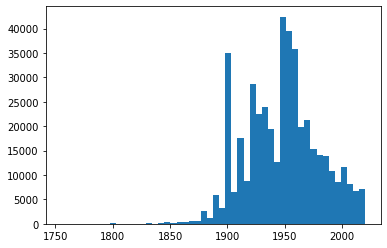

In [55]:
#Plotting Histogram
plt.hist(property_assessments['YEARBLT'],bins=50)

In [56]:
#For a features like this, we can convert it into years old based on a "current" reference date.
Reference_Year = 2020
Yearsold_df = np.linspace(0,0,len(property_assessments))
for i in range(len(property_assessments)):
    Yearsold_df[i] = Reference_Year - property_assessments['YEARBLT'].iloc[i]
    
Yearsold_df = pd.DataFrame(Yearsold_df,columns=['YEARSOLD'])
Yearsold_df.head(5)

,YEARSOLD
0,NaN
1,NaN
2,13.0
3,13.0
4,13.0


> **EXTERIORFINISH**
>> The exterior wall type.

In [57]:
#EDA on EXTERIORFINISH
col_dist(property_assessments,'EXTERIORFINISH')

Unique Values :  ['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' 'nan']

Count of Values w/o nan :  EXTERIORFINISH
1.0    162606
2.0    219986
3.0      5163
4.0      2316
5.0      1412
6.0     52772
7.0       913
8.0       310
Name: EXTERIORFINISH, dtype: int64

Value 0 Percentage = 28.01%

Value 1 Percentage = 37.894%

Value 2 Percentage = 0.889%

Value 3 Percentage = 0.399%

Value 4 Percentage = 0.243%

Value 5 Percentage = 9.09%

Value 6 Percentage = 0.157%

Value 7 Percentage = 0.053%


Based on the EDA on EXTERIORFINISH, we need to include EXTFINISH_DESC.

> **EXTFINISH_DESC**
>> Description of building material used for exterior walls.

In [58]:
#EDA on EXTFINISH_DESC
col_dist(property_assessments,'EXTFINISH_DESC')

Unique Values :  ['Brick' 'Concrete' 'Concrete Block' 'Frame' 'Log' 'Masonry FRAME' 'Stone'
 'Stucco' 'nan']

Count of Values w/o nan :  EXTFINISH_DESC
Brick             219986
Concrete             913
Concrete Block      1412
Frame             162606
Log                  310
Masonry FRAME      52772
Stone               5163
Stucco              2316
Name: EXTFINISH_DESC, dtype: int64

Value 0 Percentage = 37.894%

Value 1 Percentage = 0.157%

Value 2 Percentage = 0.243%

Value 3 Percentage = 28.01%

Value 4 Percentage = 0.053%

Value 5 Percentage = 9.09%

Value 6 Percentage = 0.889%

Value 7 Percentage = 0.399%


In [59]:
#Create DataFrame
Extfinish_df = col_split(property_assessments['EXTFINISH_DESC'])
Extfinish_df.head(5)

,nan,Concrete,Brick,Concrete Block,Frame,Masonry FRAME,Stone,Stucco,Log
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **ROOF**
>> The roofing material type.

In [60]:
#EDA on ROOF
col_dist(property_assessments,'ROOF')

Unique Values :  ['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' 'nan']

Count of Values w/o nan :  ROOF
1.0    403488
2.0     19584
3.0      1711
4.0     18201
5.0      1589
6.0       196
Name: ROOF, dtype: int64

Value 0 Percentage = 69.504%

Value 1 Percentage = 3.373%

Value 2 Percentage = 0.295%

Value 3 Percentage = 3.135%

Value 4 Percentage = 0.274%

Value 5 Percentage = 0.034%


Based on the EDA on ROOF we see that we need the description as well (ROOFDESC).

> **ROOFDESC**
>> Description of roofing material.

In [61]:
#EDA on ROOFDESC
col_dist(property_assessments,'ROOFDESC')

Unique Values :  ['METAL' 'ROLL' 'RUBBER' 'SHINGLE' 'SLATE' 'TILE' 'nan']

Count of Values w/o nan :  ROOFDESC
METAL        1711
ROLL        18201
RUBBER        196
SHINGLE    403488
SLATE       19584
TILE         1589
Name: ROOFDESC, dtype: int64

Value 0 Percentage = 0.295%

Value 1 Percentage = 3.135%

Value 2 Percentage = 0.034%

Value 3 Percentage = 69.504%

Value 4 Percentage = 3.373%

Value 5 Percentage = 0.274%


In [62]:
#Creating DataFrame
Roof_df = col_split(property_assessments['ROOFDESC'])
Roof_df.head(5)

,nan,ROLL,SHINGLE,METAL,RUBBER,SLATE,TILE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> **BASEMENT**
>> "This code describes the basement under the main part of the dwelling, and categorizes its size in relation to the main dwelling. 
1. NONE  - there is no basement.
2. SLAB/PIERS -indicates slab or pier construction.
3. CRAWL - indicates crawl space to 1/4 basement area.
4. PART - indicates basement is between 1/4 and 3/4 of the main dwelling area.
5. FULL - indicates 3/4 to full basement area."

In [63]:
#EDA on BASEMENT
col_dist(property_assessments,'BASEMENT')

Unique Values :  ['1.0' '2.0' '3.0' '4.0' '5.0' 'nan']

Count of Values w/o nan :  BASEMENT
1.0     17640
2.0      3755
3.0      3612
4.0     16575
5.0    403799
Name: BASEMENT, dtype: int64

Value 0 Percentage = 3.039%

Value 1 Percentage = 0.647%

Value 2 Percentage = 0.622%

Value 3 Percentage = 2.855%

Value 4 Percentage = 69.557%


Based on the EDA on BASEMENT we see that we need the description as well (BASEMENTDESC).

> **BASEMENTDESC**
>> Description of basement type, if one exists.

In [64]:
#EDA on BASEMENTDESC
col_dist(property_assessments,'BASEMENTDESC')

Unique Values :  ['Crawl' 'Full' 'None' 'Part' 'Slab/Piers' 'nan']

Count of Values w/o nan :  BASEMENTDESC
Crawl           3612
Full          403799
None           17640
Part           16575
Slab/Piers      3755
Name: BASEMENTDESC, dtype: int64

Value 0 Percentage = 0.622%

Value 1 Percentage = 69.557%

Value 2 Percentage = 3.039%

Value 3 Percentage = 2.855%

Value 4 Percentage = 0.647%


In [65]:
#Creating DataFrame
Basement_df = col_split(property_assessments['BASEMENTDESC'])
Basement_df.head(5)

,nan,None,Full,Slab/Piers,Part,Crawl
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


> **GRADE**
>> "Grade refers to quality of construction:<br>
- A, X, XX  - have superior materials and workmanship and are typically custom designed or historic homes.
- B - construction has above average construction and may exceed code.
- C - is the standard, construction meets code, and is typical of current materials and methods.
- D - construction is adequate, but below average with minimal features.
- E - construction lacks some basics and may be a ""camp"" or seasonal structure. <br>
Pluses and minuses may be used.

In [66]:
#EDA on GRADE
col_dist(property_assessments,'GRADE')

Unique Values :  ['A' 'A+' 'A-' 'B' 'B+' 'B-' 'C' 'C+' 'C-' 'D' 'D+' 'D-' 'E' 'E+' 'E-' 'X'
 'X+' 'X-' 'XX' 'XX+' 'XX-' 'nan']

Count of Values w/o nan :  GRADE
A        3314
A+       2689
A-       3444
B       17547
B+      14622
B-      18893
C      162699
C+      76375
C-      85272
D       17042
D+      39474
D-       2597
E          86
E+         90
E-         22
X         431
X+        317
X-        473
XX         37
XX+        18
XX-        33
Name: GRADE, dtype: int64

Value 0 Percentage = 0.571%

Value 1 Percentage = 0.463%

Value 2 Percentage = 0.593%

Value 3 Percentage = 3.023%

Value 4 Percentage = 2.519%

Value 5 Percentage = 3.254%

Value 6 Percentage = 28.026%

Value 7 Percentage = 13.156%

Value 8 Percentage = 14.689%

Value 9 Percentage = 2.936%

Value 10 Percentage = 6.8%

Value 11 Percentage = 0.447%

Value 12 Percentage = 0.015%

Value 13 Percentage = 0.016%

Value 14 Percentage = 0.004%

Value 15 Percentage = 0.074%

Value 16 Percentage = 0.055%

Value 17 Percenta

In [67]:
#Creating DataFrame
Grade_df = col_split(property_assessments['GRADE'])
Grade_df.head(5)

,nan,A+,X+,A,X-,C,B+,D+,D,C-,...,B-,B,X,E-,XX+,A-,E+,XX-,XX,E
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **CONDITION**
>> "Code for the overall physical condition or state of repair of a structure, relative to its age. Indicated by number and description:
- 1- Excellent - outstanding maintenance.
- 7- Very good - high degree of upkeep.
- 2- Good - above ordinary maintenance.
- 3- Average - ordinary maintenance, shows normal wear and tear.
- 4- Fair - sound but with noticeable deferred maintenance.
- 5- Poor - structural deterioration caused by significant and chronic deferred maintenance.
- 8- Very poor - barely livable.
- 6- Unsound - not suitable for habitation."

In [68]:
#EDA on CONDITION
col_dist(property_assessments,'CONDITION')

Unique Values :  ['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' 'nan']

Count of Values w/o nan :  CONDITION
1.0      1010
2.0     45119
3.0    318240
4.0     63245
5.0     10178
6.0      1621
7.0      4030
8.0      1966
Name: CONDITION, dtype: int64

Value 0 Percentage = 0.174%

Value 1 Percentage = 7.772%

Value 2 Percentage = 54.819%

Value 3 Percentage = 10.894%

Value 4 Percentage = 1.753%

Value 5 Percentage = 0.279%

Value 6 Percentage = 0.694%

Value 7 Percentage = 0.339%


> **CONDITIONDESC**
>> "Description for the overall physical condition or state of repair of a structure, relative to its age. Indicated by number and description:
- 1- Excellent - outstanding maintenance.
- 7- Very good - high degree of upkeep.
- 2- Good - above ordinary maintenance.
- 3- Average - ordinary maintenance, shows normal wear and tear.
- 4- Fair - sound but with noticeable deferred maintenance.
- 5- Poor - structural deterioration caused by significant and chronic deferred maintenance.
- 8- Very poor - barely livable.
- 6- Unsound - not suitable for habitation."

In [69]:
#EDA on CONDITIONDESC
col_dist(property_assessments,'CONDITIONDESC')

Unique Values :  ['AVERAGE' 'EXCELLENT' 'FAIR' 'GOOD' 'POOR' 'UNSOUND' 'VERY GOOD'
 'VERY POOR' 'nan']

Count of Values w/o nan :  CONDITIONDESC
AVERAGE      318240
EXCELLENT      1010
FAIR          63245
GOOD          45119
POOR          10178
UNSOUND        1621
VERY GOOD      4030
VERY POOR      1966
Name: CONDITIONDESC, dtype: int64

Value 0 Percentage = 54.819%

Value 1 Percentage = 0.174%

Value 2 Percentage = 10.894%

Value 3 Percentage = 7.772%

Value 4 Percentage = 1.753%

Value 5 Percentage = 0.279%

Value 6 Percentage = 0.694%

Value 7 Percentage = 0.339%


In [70]:
#Creating DataFrame
Condition_df = col_split(property_assessments['CONDITION'])
Condition_df.head(5)

,nan,3.0,1.0,2.0,5.0,4.0,8.0,6.0,7.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **CDU**
>> "CDU is a composite rating for structures measuring: 
Condition (physical condition relative to age), 
Desirability (location, style), and 
Utility (functional obsolescence of layout or design).  
Proper neighborhood delineation compensates for most Desirability and Utility issues, leaving Physical Condition the most influential factor in CDU.  CDU will be null for vacant land.
- Excellent - Perfect condition, very attractive and highly desirable.
- Very good - Slight deterioration, but still quite attractive and desirable.
- Good - Minor visible deterioration, slightly less attractive and desirable, but still useful.
- Average - Normal wear and tear, average utility and desirability.
- Fair - Usable but marked deterioration.  Somewhat unattractive and undesirable.
- Poor - Obvious deterioration, definitely undesirable.
- Very poor - Extremely undesirable and barely usable.
- Unsound - Unfit for use."

In [71]:
#EDA on CDU
col_dist(property_assessments,'CDU')

Unique Values :  ['AV' 'EX' 'FR' 'GD' 'PR' 'UN' 'VG' 'VP' 'nan']

Count of Values w/o nan :  CDU
AV    304483
EX      1288
FR     71767
GD     46552
PR     11407
UN      1582
VG      6034
VP      2294
Name: CDU, dtype: int64

Value 0 Percentage = 52.45%

Value 1 Percentage = 0.222%

Value 2 Percentage = 12.362%

Value 3 Percentage = 8.019%

Value 4 Percentage = 1.965%

Value 5 Percentage = 0.273%

Value 6 Percentage = 1.039%

Value 7 Percentage = 0.395%


In [72]:
#Creating DataFrame - Using Ordinal Encoding, just going to do it manually to ensure it is done properly
CDU_df = col_split(property_assessments['CDU'])
CDU_df.head(5)

,nan,AV,EX,GD,FR,PR,VP,UN,VG
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **TOTALROOMS**
>> Total number of rooms in the main dwelling.  This includes Rec-rooms and FBLA (Finished Basement Living Area).  This count is for descriptive purposes only and does not affect assessed value.

In [73]:
#EDA on TOTALROOMS
col_dist(property_assessments,'TOTALROOMS')

Unique Values :  ['0.0' '1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0'
 '18.0' '19.0' '2.0' '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '27.0'
 '3.0' '30.0' '32.0' '34.0' '36.0' '4.0' '47.0' '5.0' '51.0' '53.0' '54.0'
 '56.0' '58.0' '6.0' '65.0' '7.0' '8.0' '87.0' '9.0' 'nan']

Count of Values w/o nan :  TOTALROOMS
0.0         15
1.0         31
2.0        299
3.0       4066
4.0      30095
5.0      85961
6.0     147989
7.0      78936
8.0      57057
9.0      19370
10.0     11482
11.0      2702
12.0      4663
13.0       575
14.0       602
15.0       401
16.0       723
17.0        44
18.0       109
19.0        11
20.0       188
21.0        11
22.0        13
23.0         3
24.0        44
25.0         3
27.0         1
30.0         1
32.0         1
34.0         1
36.0         1
47.0         1
51.0         1
53.0         1
54.0         1
56.0         1
58.0         1
65.0         1
87.0         3
Name: TOTALROOMS, dtype: int64

Value 0 Percentage = 0.003%

Value 1 Percentage = 0.0

In [74]:
#Creating DataFrame
Totalrooms_df = property_assessments['TOTALROOMS']
Totalrooms_df.head(5)

0    NaN
1    NaN
2    3.0
3    4.0
4    4.0
Name: TOTALROOMS, dtype: float64

> **BEDROOMS**
>> The total number of separate rooms designed to be used as bedrooms.  If a room was designed to be a bedroom, but is being utilized for some other purpose - such as a den, it is to be included in this count.  This is for descriptive purposes only and does not affect value.


In [75]:
#EDA on BEDROOMS
col_dist(property_assessments,'BEDROOMS')

Unique Values :  ['0.0' '1.0' '10.0' '11.0' '12.0' '14.0' '15.0' '18.0' '2.0' '3.0' '4.0'
 '5.0' '6.0' '7.0' '8.0' '9.0' 'nan']

Count of Values w/o nan :  BEDROOMS
0.0         94
1.0       8133
2.0     106169
3.0     225362
4.0      87514
5.0      11266
6.0       5235
7.0        476
8.0        946
9.0        132
10.0        42
11.0         8
12.0        58
14.0         1
15.0         1
18.0         1
Name: BEDROOMS, dtype: int64

Value 0 Percentage = 0.016%

Value 1 Percentage = 1.401%

Value 2 Percentage = 18.288%

Value 3 Percentage = 38.82%

Value 4 Percentage = 15.075%

Value 5 Percentage = 1.941%

Value 6 Percentage = 0.902%

Value 7 Percentage = 0.082%

Value 8 Percentage = 0.163%

Value 9 Percentage = 0.023%

Value 10 Percentage = 0.007%

Value 11 Percentage = 0.001%

Value 12 Percentage = 0.01%

Value 13 Percentage = 0.0%

Value 14 Percentage = 0.0%

Value 15 Percentage = 0.0%


In [76]:
#Creating DataFrame
Bedrooms_df = property_assessments['BEDROOMS']

> **FULLBATHS**
>> A full bath has a toilet, sink and bathing facility (shower or tub).

In [77]:
#EDA on FULLBATHS
col_dist(property_assessments,'FULLBATHS')

Unique Values :  ['0.0' '1.0' '12.0' '13.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0'
 'nan']

Count of Values w/o nan :  FULLBATHS
0.0        449
1.0     269915
2.0     147276
3.0      21380
4.0       5332
5.0        735
6.0        218
7.0         26
8.0         19
9.0          2
12.0         2
13.0         1
Name: FULLBATHS, dtype: int64

Value 0 Percentage = 0.077%

Value 1 Percentage = 46.495%

Value 2 Percentage = 25.369%

Value 3 Percentage = 3.683%

Value 4 Percentage = 0.918%

Value 5 Percentage = 0.127%

Value 6 Percentage = 0.038%

Value 7 Percentage = 0.004%

Value 8 Percentage = 0.003%

Value 9 Percentage = 0.0%

Value 10 Percentage = 0.0%

Value 11 Percentage = 0.0%


In [78]:
#Creating DataFrame
Fullbaths_df = property_assessments['FULLBATHS']
Fullbaths_df.head(5)

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
Name: FULLBATHS, dtype: float64

> **HALFBATHS**
>> A half bath has a toilet and sink only.

In [79]:
col_dist(property_assessments,'HALFBATHS')

Unique Values :  ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' 'nan']

Count of Values w/o nan :  HALFBATHS
0.0    243429
1.0    184300
2.0     13498
3.0       475
4.0        46
5.0         9
6.0         2
7.0         3
8.0         3
9.0         1
Name: HALFBATHS, dtype: int64

Value 0 Percentage = 41.932%

Value 1 Percentage = 31.747%

Value 2 Percentage = 2.325%

Value 3 Percentage = 0.082%

Value 4 Percentage = 0.008%

Value 5 Percentage = 0.002%

Value 6 Percentage = 0.0%

Value 7 Percentage = 0.001%

Value 8 Percentage = 0.001%

Value 9 Percentage = 0.0%


In [80]:
#Creating DataFrame
Halfbaths_df = property_assessments['HALFBATHS']
Halfbaths_df.head(5)

0    NaN
1    NaN
2    0.0
3    0.0
4    0.0
Name: HALFBATHS, dtype: float64

> **HEATINGCOOLING**
>> Code for the type of Heating / Cooling system.

In [81]:
#EDA on HEATINGCOOLING
col_dist(property_assessments,'HEATINGCOOLING')

Unique Values :  ['1' '2' '3' '4' '5' '6' '7' '8' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'nan']

Count of Values w/o nan :  HEATINGCOOLING
1       675
2    183348
3       226
4       517
5       680
6       458
7       177
8       859
A        81
B    256745
C        67
D       517
E        70
F       778
G        16
H        87
Name: HEATINGCOOLING, dtype: int64

Value 0 Percentage = 0.116%

Value 1 Percentage = 31.583%

Value 2 Percentage = 0.039%

Value 3 Percentage = 0.089%

Value 4 Percentage = 0.117%

Value 5 Percentage = 0.079%

Value 6 Percentage = 0.03%

Value 7 Percentage = 0.148%

Value 8 Percentage = 0.014%

Value 9 Percentage = 44.226%

Value 10 Percentage = 0.012%

Value 11 Percentage = 0.089%

Value 12 Percentage = 0.012%

Value 13 Percentage = 0.134%

Value 14 Percentage = 0.003%

Value 15 Percentage = 0.015%


> **FIREPLACES**
>> The number of wood-burning fireplace chimneys/vents.  This need not equal the number of working fireplaces in the dwelling.  This number excludes roof stacks built for bathroom venting, natural gas outlets, etc.

In [82]:
#EDA on FIREPLACES
col_dist(property_assessments,'FIREPLACES')

Unique Values :  ['0.0' '1.0' '12.0' '2.0' '22.0' '3.0' '4.0' '5.0' '6.0' '7.0' '9.0' 'nan']

Count of Values w/o nan :  FIREPLACES
0.0     270224
1.0     130794
2.0       9578
3.0        801
4.0        232
5.0         24
6.0         12
7.0          3
9.0          1
12.0         1
22.0         1
Name: FIREPLACES, dtype: int64

Value 0 Percentage = 46.548%

Value 1 Percentage = 22.53%

Value 2 Percentage = 1.65%

Value 3 Percentage = 0.138%

Value 4 Percentage = 0.04%

Value 5 Percentage = 0.004%

Value 6 Percentage = 0.002%

Value 7 Percentage = 0.001%

Value 8 Percentage = 0.0%

Value 9 Percentage = 0.0%

Value 10 Percentage = 0.0%


In [83]:
#Creating DataFrame
Fireplaces_df = property_assessments['FIREPLACES']
Fireplaces_df.head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: FIREPLACES, dtype: float64

> **BSMTGARAGE**
>> The number of vehicle spaces available in a garage that is basement level and comprises a portion of the main dwelling’s basement.  This does not include detached or attached above-grade garages.

In [84]:
#EDA on BSMTGARAGE
col_dist(property_assessments,'BSMTGARAGE')

Unique Values :  ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' 'nan']

Count of Values w/o nan :  BSMTGARAGE
0.0    221849
1.0    118496
2.0     80275
3.0      4683
4.0       454
5.0        47
6.0        21
Name: BSMTGARAGE, dtype: int64

Value 0 Percentage = 38.215%

Value 1 Percentage = 20.412%

Value 2 Percentage = 13.828%

Value 3 Percentage = 0.807%

Value 4 Percentage = 0.078%

Value 5 Percentage = 0.008%

Value 6 Percentage = 0.004%


In [85]:
#Creating DataFrame
Bsmtgarage_df = property_assessments['BSMTGARAGE']
Bsmtgarage_df.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: BSMTGARAGE, dtype: float64

> **FINISHEDLIVINGAREA**
>> Finished living area, as measured from the outside of the structure.

In [86]:
#EDA on FINISHEDLIVINGAREA
property_assessments['FINISHEDLIVINGAREA'].head()

0       NaN
1       NaN
2    1520.0
3    1858.0
4    1567.0
Name: FINISHEDLIVINGAREA, dtype: float64

(0, 5000)

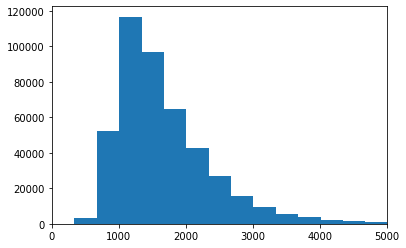

In [87]:
#Distribution of Values
plt.hist(property_assessments['FINISHEDLIVINGAREA'].dropna(),bins = 100)
plt.xlim([0,5000])

In [88]:
#Creating DataFrame
Finishedlivingarea_df = property_assessments['FINISHEDLIVINGAREA']
Finishedlivingarea_df.head()

0       NaN
1       NaN
2    1520.0
3    1858.0
4    1567.0
Name: FINISHEDLIVINGAREA, dtype: float64

> **STYLE**
>> The building style.

In [89]:
#EDA on STYLE
col_dist(property_assessments,'STYLE')

Unique Values :  ['1' '1.0' '10' '10.0' '11' '11.0' '12' '12.0' '13' '13.0' '14' '14.0'
 '15' '15.0' '16' '16.0' '17' '18' '18.0' '19' '19.0' '2' '2.0' '20'
 '20.0' '21' '21.0' '22' '22.0' '23' '24' '24.0' '25' '25.0' '26' '27'
 '27.0' '3' '3.0' '4' '4.0' '5' '5.0' '6' '6.0' '7' '7.0' '8' '8.0' '9'
 '9.0' 'M1' 'M2' 'nan']

Count of Values w/o nan :  STYLE
1.0        643
2.0        165
3.0        121
4.0       1660
5.0        270
6.0          2
7.0        125
8.0         61
9.0        549
10.0         1
11.0      1256
12.0      1734
13.0      2574
14.0        75
15.0         1
16.0      8140
18.0        90
19.0        69
20.0      1681
21.0      1330
22.0       226
24.0        59
25.0       121
27.0       174
1        71393
10         243
11        3573
12        4761
13       19787
14         519
15          34
16      109719
17         211
18        9314
19         984
2        11089
20        8697
21        2400
22        3914
23         116
24        1866
25        3413
26        24

Based on EDA on STYLE, we find it necessary to include STYLEDESC to better understand feature.

> **STYLEDESC**
>> Description for building style.

In [90]:
#EDA on STYLEDESC
col_dist(property_assessments,'STYLEDESC')

Unique Values :  ['BI-LEVEL' 'BUNGALOW' 'CAPE COD' 'COLONIAL' 'CONDO' 'CONDO CONV'
 'CONDO END' 'CONDO GRDN' 'CONDO HR' 'CONDO INT' 'CONDO PAT/CARG'
 'CONDO SINGLE' 'CONTEMPORARY' 'CONVENTIONAL' 'LOG CABIN' 'MANUFACTURED'
 'MODULAR HOME' 'MULTI-FAMILY' 'OLD STYLE' 'OTHER' 'RANCH' 'ROW END'
 'ROW INTERIOR' 'SEMI DETACHED' 'SPLIT LEVEL' 'TOWNHOUSE' 'TUDOR'
 'VICTORIAN' 'nan']

Count of Values w/o nan :  STYLEDESC
BI-LEVEL           17142
BUNGALOW            9404
CAPE COD           40006
COLONIAL           92041
CONDO                212
CONDO CONV           823
CONDO END           1925
CONDO GRDN          4140
CONDO HR            3730
CONDO INT           3534
CONDO PAT/CARG      2404
CONDO SINGLE         116
CONTEMPORARY        2925
CONVENTIONAL         116
LOG CABIN            211
MANUFACTURED        3651
MODULAR HOME         244
MULTI-FAMILY       22361
OLD STYLE         117859
OTHER                 35
RANCH              72036
ROW END             4829
ROW INTERIOR        6495
SEMI DETAC

So a key problem I am seeing here is that many of the feature columns could be split into many columns and we can't necessarily rely on employing all features and then applying feature selection due to the curse of dimensionality.  To this end I wonder if we would able to use a feature selection method when using a subset of the features.  For example for this feature (STYLEDESC) would it be possible to consolidate some values or use feature selection methods directly on this feature.

## House Attribute Features EDA and Cleaning

> **MUNICODE**
>> Municipality number associated with specified parcel.

(array([12622., 19792., 33939., 35570., 10563., 23375.,  6806.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  5089.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3502.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,   400.,  4763.,  6360.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

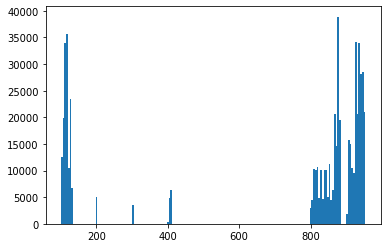

In [91]:
#EDA on MUNICODE
plt.hist(property_assessments['MUNICODE'],bins=len(property_assessments['MUNICODE'].unique()))

Based on the distribution plot it seems like our properties might be able to be broken down into clusters (not machine learning sense).  Lets look at MUNICODEDESC.

> **MUNIDESC**
>> Municipality name associated with specified parcel.

In [92]:
#EDA on MUNIDESC
col_dist(property_assessments,'MUNIDESC')

Unique Values :  ['10th Ward -  McKEESPORT' '10th Ward - PITTSBURGH'
 '11th Ward  - McKEESPORT' '11th Ward - PITTSBURGH'
 '12th Ward  - McKEESPORT' '12th Ward - PITTSBURGH'
 '13th Ward - PITTSBURGH' '14th Ward - PITTSBURGH'
 '15th Ward - PITTSBURGH' '16th Ward - PITTSBURGH'
 '17th Ward - PITTSBURGH' '18th Ward - PITTSBURGH'
 '19th Ward - PITTSBURGH' '1st Ward  - DUQUESNE' '1st Ward  - McKEESPORT'
 '1st Ward  - PITTSBURGH' '1st Ward - CLAIRTON' '20th Ward - PITTSBURGH'
 '21st Ward - PITTSBURGH' '22nd Ward - PITTSBURGH'
 '23rd Ward - PITTSBURGH' '24th Ward - PITTSBURGH'
 '25th Ward - PITTSBURGH' '26th Ward - PITTSBURGH'
 '27th Ward - PITTSBURGH' '28th Ward - PITTSBURGH'
 '29th Ward - PITTSBURGH' '2nd Ward  - DUQUESNE' '2nd Ward - CLAIRTON'
 '2nd Ward - McKEESPORT  ' '2nd Ward - PITTSBURGH'
 '30th Ward - PITTSBURGH' '31st Ward - PITTSBURGH'
 '32nd Ward - PITTSBURGH' '3rd Ward  - DUQUESNE' '3rd Ward - McKEESPORT'
 '3rd Ward - PITTSBURGH' '4th Ward - McKEESPORT ' '4th Ward - PITTSBURGH'
 '5

From the values within MUNIDESC we see that it might not be reasonable to cluster locations as mentioned before.  Location will most likely be a deciding factor for sales price, however this EDA has not been completed.

> **SCHOOLCODE**
>> School district number associated with specified parcel.

In [93]:
#EDA on SCHOOLCODE
len(property_assessments['SCHOOLCODE'].unique())

46

(array([1.09870e+04, 1.13100e+04, 1.50210e+04, 1.34280e+04, 3.80700e+03,
        6.46700e+03, 1.49540e+04, 2.47070e+04, 5.08900e+03, 3.49000e+03,
        8.16500e+03, 3.50200e+03, 9.12000e+03, 0.00000e+00, 1.02160e+04,
        2.64260e+04, 0.00000e+00, 8.21200e+03, 1.04440e+04, 8.74000e+03,
        1.74920e+04, 1.28930e+04, 1.15860e+04, 1.20110e+04, 2.18010e+04,
        1.77050e+04, 4.66900e+03, 2.07690e+04, 1.16740e+04, 6.83000e+03,
        2.25430e+04, 6.68100e+03, 7.89100e+03, 6.27200e+03, 7.96000e+03,
        6.42500e+03, 0.00000e+00, 0.00000e+00, 7.83400e+03, 1.14960e+04,
        9.52700e+03, 1.06620e+04, 7.23800e+03, 1.44084e+05, 3.26000e+02,
        7.20000e+01]),
 array([ 1.        ,  2.06521739,  3.13043478,  4.19565217,  5.26086957,
         6.32608696,  7.39130435,  8.45652174,  9.52173913, 10.58695652,
        11.65217391, 12.7173913 , 13.7826087 , 14.84782609, 15.91304348,
        16.97826087, 18.04347826, 19.10869565, 20.17391304, 21.23913043,
        22.30434783, 23.3695

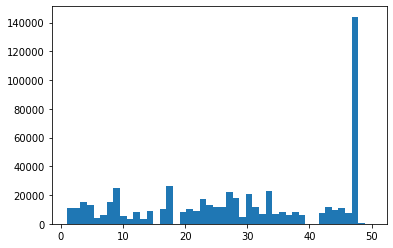

In [94]:
#Distribution on SCHOOLCODE
plt.hist(property_assessments['SCHOOLCODE'],bins=len(property_assessments['SCHOOLCODE'].unique()))

> **NEIGHCODE**
>> The ID number for the valuation neighborhood containing this parcel.   Valuation neighborhoods were delineated as part of the 2013 reassessment.  A valuation neighborhood is a geographic area exhibiting a high degree of homogeneity in economic amenities, land use, economic trends, and property characteristics such as quality, age, and condition. 

In [95]:
#EDA on NEIGHCODE
len(property_assessments['NEIGHCODE'].unique())

1000

In [96]:
#Distribution on NEIGHCODE
col_dist(property_assessments,'NEIGHCODE')

Unique Values :  ['10101' '10201' '10301' '10401' '10402' '10403' '10404' '10501' '10502'
 '10503' '10601' '10701' '10702' '10703' '10801' '10802' '10803' '10901'
 '10902' '11001' '11002' '11003' '11101' '11102' '11103' '11201' '11202'
 '11203' '11301' '11303' '11401' '11402' '11403' '11404' '11501' '11502'
 '11503' '11601' '11602' '11603' '11701' '11702' '11801' '11802' '11803'
 '11804' '11901' '11902' '11903' '11904' '11905' '12001' '12002' '12003'
 '12004' '120T2' '120T3' '12101' '12102' '12201' '12301' '12401' '12402'
 '12403' '12501' '12502' '12601' '12602' '12603' '12604' '12701' '12702'
 '12703' '12801' '12802' '12803' '128T1' '12901' '12902' '129T1' '13001'
 '13002' '13101' '13102' '13103' '131T1' '13201' '13202' '13203' '132T1'
 '20001' '20002' '20003' '30001' '30003' '30004' '302T1' '40001' '40002'
 '40003' '40005' '40006' '40007' '40008' '40010' '40011' '40012' '50M01'
 '51C01' '51C02' '51C03' '51C04' '51C04B' '51C06' '51C08' '51C09' '51C11'
 '51C12' '51C13' '51C14' '51C14A'

> **LOTAREA**
>> Total square footage of land.

(array([5.80516e+05, 5.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

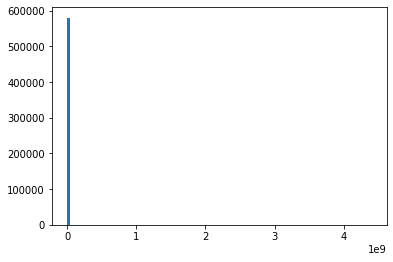

In [97]:
#EDA on LOTAREA
plt.hist(property_assessments['LOTAREA'],bins=100)

In [98]:
#Creating DataFrame
Lotarea_df = property_assessments['LOTAREA']
Lotarea_df.head()

0     9847
1    28000
2        0
3        0
4        0
Name: LOTAREA, dtype: int64

----

# Building Datasets


**Build 1**
We are training a global model for all houses in allegney county.

**-Main Engineered Features-**

MT -> The goal here is to capture what all of the features aim to tell us as compactly as possible.  Currently I believe these three can capture what we need.

**[Uniqueness]** <br>
How many houses have similar attributes?

How to Create: <br>
Use distance based clustering to group houses of similar attributes together by defining an attribute feature space.

Required Dataset:
house_attribute.csv

**[Location Demand Ranking/Score]** <br>
How do sale prices compare to assessment values for houses of a given zip code?

How to Create (Going to Change this one) : <br>
Use distance based clustering to group houses of similar location together by defining a location feature space.
Then rank each cluster on its average (possibly weighted average on how close each point is to the centroid)

Required Dataset:
house_location_clustered.csv

**[Attribute Demand Ranking/Score]** <br>
How do sale prices compare to assessment values for houses of a given attribute type?

How to Create: <br>
Use distance based clustering to group houses of similar attributes together by defining an attribute feature space.
Then rank each cluster on its average (possibly weighted average on how close each point is to the centroid).

Required Dataset:
house_attribute_clustered.csv

----

### Preliminary Analysis

In [223]:
#Renaming Data: Note also using "valid sales" as determined by SALECODE
df = valid_property_assessments.dropna(axis=0,subset=['SALEPRICE'])
df['SALEPRICE'].isnull().values.any()

False

In [224]:
#How many observations are there with non nan SALEPRICE?
len(df)

159404

In [225]:
#How many zeroes are there?
len(df[df.SALEPRICE==0])

57

In [226]:
#How many Residential property classes are there?
len(df[df.CLASS=='R'])

152855

In [227]:
#We are going to only look at Residential Properties
df = df[df.CLASS=='R']

In [228]:
#How many Zeroes are there NOW?
len(df[df.SALEPRICE==0])

47

In [229]:
#Declaring Bounds
lower_bound = 10000
upper_bound = 1000000

In [230]:
#With Lowerbound
len(df[df.SALEPRICE>=lower_bound])

149141

In [231]:
#With Upperbound and Lowerbound
len(df[df.SALEPRICE>=lower_bound][df.SALEPRICE<upper_bound])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


148914

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([1.5419e+04, 2.1033e+04, 2.2098e+04, 1.9045e+04, 1.1726e+04,
        1.1612e+04, 9.5540e+03, 7.6750e+03, 5.9820e+03, 3.9040e+03,
        3.5200e+03, 2.8830e+03, 2.3890e+03, 1.9670e+03, 1.4590e+03,
        1.3050e+03, 1.0310e+03, 9.1100e+02, 7.6800e+02, 6.5800e+02,
        5.6400e+02, 4.0100e+02, 3.8500e+02, 3.2800e+02, 2.3200e+02,
        2.2500e+02, 2.2800e+02, 1.9400e+02, 1.8000e+02, 1.6700e+02,
        1.0300e+02, 1.2500e+02, 1.0400e+02, 8.2000e+01, 7.9000e+01,
        7.7000e+01, 7.0000e+01, 5.4000e+01, 5.9000e+01, 5.0000e+01,
        3.7000e+01, 4.8000e+01, 3.8000e+01, 3.1000e+01, 3.5000e+01,
        1.7000e+01, 2.0000e+01, 1.4000e+01, 1.0000e+01, 1.8000e+01]),
 array([ 10000.,  29798.,  49596.,  69394.,  89192., 108990., 128788.,
        148586., 168384., 188182., 207980., 227778., 247576., 267374.,
        287172., 306970., 326768., 346566., 366364., 386162., 405960.,
        425758., 445556., 465354., 485152., 504950., 524748., 544546.,
        564344., 584142., 603940.,

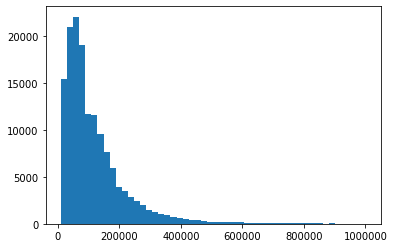

In [232]:
plt.hist(df[df.SALEPRICE>=lower_bound][df.SALEPRICE<upper_bound]['SALEPRICE'],bins=50)

In [233]:
#With Lowerbound
print('Percent of Observations Left {}%' .format(round((len(df[df.SALEPRICE>=lower_bound])*100)/len(df),2)))

Percent of Observations Left 97.57%


In [234]:
#With Upperbound and Lowerbound
print('Percent of Observations Left {}%' .format(round((len(df[df.SALEPRICE>=lower_bound][df.SALEPRICE<upper_bound])*100)/len(df),2)))

Percent of Observations Left 97.42%


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [466]:
#Creating New Dataframe
bounded_df = df[df.SALEPRICE>=lower_bound][df.SALEPRICE<upper_bound]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


----

### Demand Analysis

Now lets look at the relationship between sale price and the provided assessment values.  This is the assumption that the current builds idea of "demand" is based off of.

We have three types of assessments to investigate:

- County
- Fairmarket
- Local

For now Demand is defined as:

$DEMAND=\frac{SALEPRICE - ASSESSMENT}{ASSESSMENT}$

> **County Assessment**

In [467]:
#How many non nan values are there for County assessment?
l = len(bounded_df.dropna(axis=0,subset=['COUNTYTOTAL']))
print('Number of non nan observations = {} with non-nan observation percentage = {}%'\
      .format(l,l/len(bounded_df)))

Number of non nan observations = 148914 with non-nan observation percentage = 1.0%


In [468]:
#How many observations with bounds? - Note these bounds are not applied
l = len(bounded_df[bounded_df.COUNTYTOTAL>=lower_bound][bounded_df.COUNTYTOTAL<upper_bound])
print('Number of observations = {} with observation percentage = {}%'\
      .format(l,round((l*100)/len(df),2)))

Number of observations = 145745 with observation percentage = 95.35%


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [469]:
#Applying Bounds
bounded_df = bounded_df[bounded_df.COUNTYTOTAL >= lower_bound][bounded_df.COUNTYTOTAL<= upper_bound]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([8.7290e+03, 1.5046e+04, 1.8535e+04, 1.8068e+04, 1.6958e+04,
        1.4840e+04, 1.1168e+04, 8.5630e+03, 6.4480e+03, 5.2390e+03,
        4.1500e+03, 3.1930e+03, 2.5320e+03, 1.9540e+03, 1.7430e+03,
        1.3810e+03, 1.1150e+03, 9.0600e+02, 7.2000e+02, 6.4900e+02,
        5.1200e+02, 4.5100e+02, 3.6300e+02, 3.2100e+02, 2.3400e+02,
        2.3300e+02, 1.9400e+02, 1.5000e+02, 1.7400e+02, 1.3700e+02,
        1.3300e+02, 1.1400e+02, 1.0600e+02, 1.0600e+02, 7.4000e+01,
        7.4000e+01, 7.0000e+01, 6.0000e+01, 4.5000e+01, 4.5000e+01,
        3.0000e+01, 3.8000e+01, 2.9000e+01, 2.9000e+01, 2.4000e+01,
        1.6000e+01, 1.0000e+01, 1.9000e+01, 7.0000e+00, 1.0000e+01]),
 array([ 10000.,  29776.,  49552.,  69328.,  89104., 108880., 128656.,
        148432., 168208., 187984., 207760., 227536., 247312., 267088.,
        286864., 306640., 326416., 346192., 365968., 385744., 405520.,
        425296., 445072., 464848., 484624., 504400., 524176., 543952.,
        563728., 583504., 603280.,

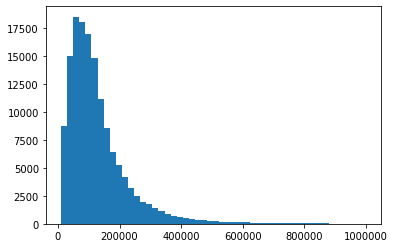

In [470]:
#What does the distribution of County assessments look like?
plt.hist(bounded_df['COUNTYTOTAL'][bounded_df.COUNTYTOTAL<upper_bound],bins=50)

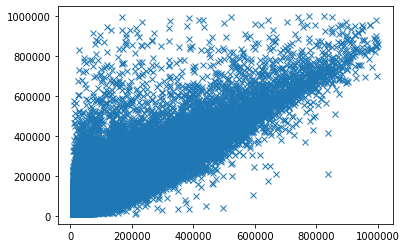

In [471]:
#Looking at Relationship
plt.plot(bounded_df['SALEPRICE'],bounded_df['COUNTYTOTAL'],'x')

In [472]:
#Generating a Linear Regression and Outputing R^2
reg = LinearRegression().fit(np.array(bounded_df['COUNTYTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))
reg.score(np.array(bounded_df['COUNTYTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))

0.7191830017814521

> **Local Assessment**

In [473]:
#How many non nan values are there for local assessment?
l = len(bounded_df.dropna(axis=0,subset=['LOCALTOTAL']))
print('Number of non nan observations = {} with non-nan observation percentage = {}'\
      .format(l,l/len(bounded_df)))

Number of non nan observations = 145746 with non-nan observation percentage = 1.0


In [474]:
#How many observations with bounds?
l = len(bounded_df[bounded_df.LOCALTOTAL>=lower_bound][bounded_df.LOCALTOTAL<upper_bound])
print('Number of observations = {} with observation percentage = {}%'\
      .format(l,round((l*100)/len(df),2)))

Number of observations = 145738 with observation percentage = 95.34%


In [475]:
#Applying Bounds
bounded_df = bounded_df[bounded_df.LOCALTOTAL >= lower_bound][bounded_df.LOCALTOTAL <= upper_bound]

(array([3.5500e+03, 1.0418e+04, 1.5807e+04, 1.8259e+04, 1.7055e+04,
        1.6353e+04, 1.3796e+04, 1.0271e+04, 8.0040e+03, 6.0810e+03,
        4.9870e+03, 3.8480e+03, 3.1020e+03, 2.3540e+03, 1.9550e+03,
        1.6670e+03, 1.3090e+03, 1.0680e+03, 8.5700e+02, 7.1800e+02,
        6.0600e+02, 4.7900e+02, 4.5800e+02, 3.2400e+02, 3.0900e+02,
        2.3000e+02, 2.3300e+02, 1.7400e+02, 1.5000e+02, 1.8100e+02,
        1.3300e+02, 1.2900e+02, 1.1500e+02, 1.0000e+02, 1.0000e+02,
        7.6000e+01, 6.9000e+01, 7.0000e+01, 6.7000e+01, 4.6000e+01,
        3.2000e+01, 2.8000e+01, 3.7000e+01, 3.9000e+01, 2.4000e+01,
        1.7000e+01, 1.5000e+01, 1.3000e+01, 1.7000e+01, 8.0000e+00]),
 array([ 10000.,  29786.,  49572.,  69358.,  89144., 108930., 128716.,
        148502., 168288., 188074., 207860., 227646., 247432., 267218.,
        287004., 306790., 326576., 346362., 366148., 385934., 405720.,
        425506., 445292., 465078., 484864., 504650., 524436., 544222.,
        564008., 583794., 603580.,

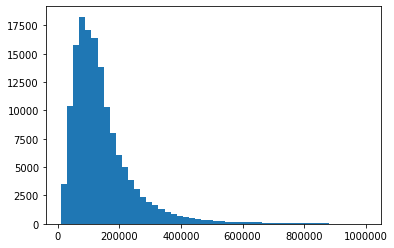

In [476]:
#What does the distribution of Local assessments look like?
plt.hist(bounded_df['LOCALTOTAL'][bounded_df.LOCALTOTAL<upper_bound],bins=50)

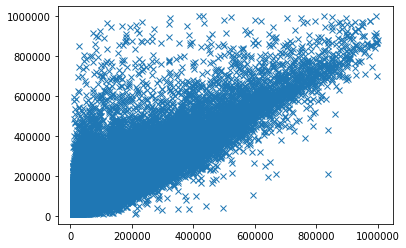

In [477]:
#Looking at Relationship
plt.plot(bounded_df['SALEPRICE'],bounded_df['LOCALTOTAL'],'x')

In [478]:
#Generating a Linear Regression and Outputing R^2
reg = LinearRegression().fit(np.array(bounded_df['LOCALTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))
reg.score(np.array(bounded_df['LOCALTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))

0.7161668829992048

> **Fairmarket Assessment**

In [479]:
#How many non nan values are there for Fairmarket assessment?
l = len(bounded_df.dropna(axis=0,subset=['FAIRMARKETTOTAL']))
print('Number of non nan observations = {} with non-nan observation percentage = {}'\
      .format(l,l/len(bounded_df)))

Number of non nan observations = 145741 with non-nan observation percentage = 1.0


In [480]:
#How many observations with bounds?
l = len(bounded_df[bounded_df.FAIRMARKETTOTAL>=lower_bound][bounded_df.FAIRMARKETTOTAL<upper_bound])
print('Number of observations = {} with observation percentage = {}%'\
      .format(l,round((l*100)/len(df),2)))

Number of observations = 145738 with observation percentage = 95.34%


In [481]:
#Applying Bounds
bounded_df = bounded_df[bounded_df.FAIRMARKETTOTAL >= lower_bound][bounded_df.FAIRMARKETTOTAL<= upper_bound]

(array([3.5460e+03, 1.0414e+04, 1.5804e+04, 1.8254e+04, 1.7048e+04,
        1.6351e+04, 1.3800e+04, 1.0272e+04, 8.0100e+03, 6.0800e+03,
        4.9850e+03, 3.8440e+03, 3.1070e+03, 2.3540e+03, 1.9560e+03,
        1.6700e+03, 1.3080e+03, 1.0710e+03, 8.5700e+02, 7.1800e+02,
        6.0600e+02, 4.7900e+02, 4.5900e+02, 3.2500e+02, 3.0900e+02,
        2.3200e+02, 2.3200e+02, 1.7500e+02, 1.4900e+02, 1.8200e+02,
        1.3200e+02, 1.3000e+02, 1.1600e+02, 1.0100e+02, 9.9000e+01,
        7.7000e+01, 6.9000e+01, 7.0000e+01, 6.8000e+01, 4.6000e+01,
        3.1000e+01, 2.8000e+01, 3.7000e+01, 4.0000e+01, 2.4000e+01,
        1.8000e+01, 1.6000e+01, 1.3000e+01, 1.7000e+01, 9.0000e+00]),
 array([ 10000.,  29786.,  49572.,  69358.,  89144., 108930., 128716.,
        148502., 168288., 188074., 207860., 227646., 247432., 267218.,
        287004., 306790., 326576., 346362., 366148., 385934., 405720.,
        425506., 445292., 465078., 484864., 504650., 524436., 544222.,
        564008., 583794., 603580.,

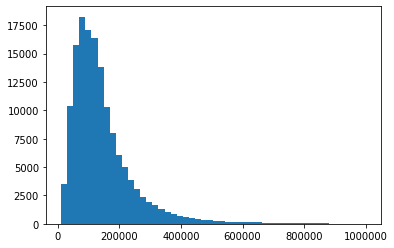

In [482]:
#What does the distribution of County assessments look like?
plt.hist(bounded_df['FAIRMARKETTOTAL'][bounded_df.FAIRMARKETTOTAL<upper_bound],bins=50)

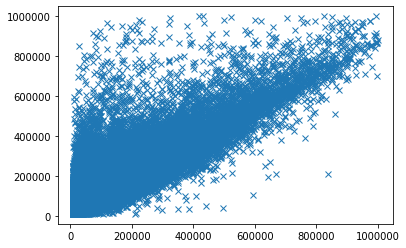

In [483]:
#Looking at Relationship
plt.plot(bounded_df['SALEPRICE'],bounded_df['FAIRMARKETTOTAL'],'x')

In [484]:
#Generating a Linear Regression and Outputing R^2
reg = LinearRegression().fit(np.array(bounded_df['FAIRMARKETTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))
reg.score(np.array(bounded_df['FAIRMARKETTOTAL']).reshape(-1,1),np.array(bounded_df['SALEPRICE']).reshape(-1,1))

0.7157887895171944

From the results shown above within the demand analysis section we see strong promise!  Now lets get some idea of what this "demand" can be quantified as.

> **Demand Based on County Assessment**

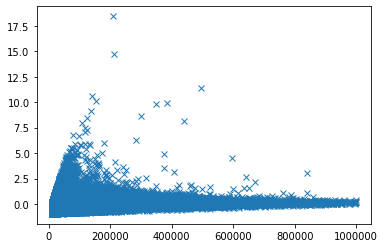

In [518]:
#We are going to do this explicitly
demand_county = np.linspace(0,0,len(bounded_df))

for i in range(len(bounded_df)):
    demand_county[i] = (bounded_df['SALEPRICE'].iloc[i] - bounded_df['COUNTYTOTAL'].iloc[i])/bounded_df['COUNTYTOTAL'].iloc[i]
plt.plot(bounded_df['SALEPRICE'],demand_county,'x')

> **Demand Based on Local Assessment**

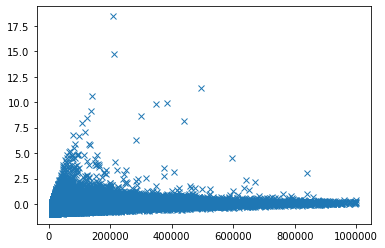

In [516]:
#We are going to do this explicitly
demand_local = np.linspace(0,0,len(bounded_df))

for i in range(len(bounded_df)):
    demand_local[i] = (bounded_df['SALEPRICE'].iloc[i] - bounded_df['LOCALTOTAL'].iloc[i])/bounded_df['LOCALTOTAL'].iloc[i]
plt.plot(bounded_df['SALEPRICE'],demand_local,'x')

> **Demand Based on Fairmarket Assessment**

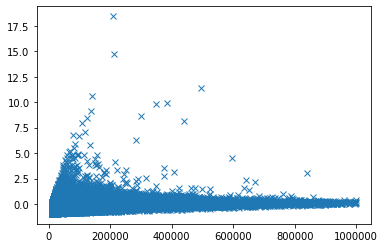

In [514]:
#We are going to do this explicitly
demand_fairmarket = np.linspace(0,0,len(bounded_df))

for i in range(len(bounded_df)):
    demand_fairmarket[i] = (bounded_df['SALEPRICE'].iloc[i] - bounded_df['FAIRMARKETTOTAL'].iloc[i])/bounded_df['FAIRMARKETTOTAL'].iloc[i]
plt.plot(bounded_df['SALEPRICE'],demand_fairmarket,'x')

**Combining Demand Measures as No Assessment Value is Particularly Valuable Comparatively**

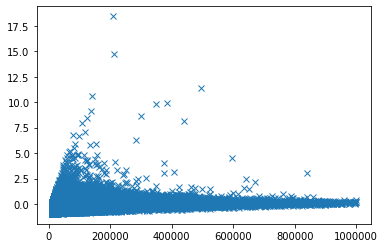

In [519]:
#Combining Via Arithmetic Average
demand_df = np.linspace(0,0,len(bounded_df))

for i in range(len(demand_df)):
    nonnan_count = 0
    tc = demand_county[i]
    tl = demand_local[i]
    tf = demand_fairmarket[i]
    
    if isNaN(tc) == True:
        tc = 0
    else:
        nonnan_count += 1
    
    if isNaN(tl) == True:
        tl = 0
    else:
        nonnan_count += 1
    
    if isNaN(tf) == True:
        tf = 0
    else:
        nonnan_count += 1
    
    demand_df[i] = (tc+tl+tf)/nonnan_count
plt.plot(bounded_df['SALEPRICE'],demand_df,'x')

In [522]:
#Converting to Dataframe and combining with bounded_df
demand_df = pd.DataFrame(demand_df,columns=['DEMAND'],index=bounded_df.index)

#Now we have to drop all observations without all 3 assessments which are denoted by a nan demand column
l = len(demand_df.dropna())
print('Number of non nan observations = {} with non-nan observation percentage = {}'\
      .format(l,l/len(demand_df)))

Number of non nan observations = 145741 with non-nan observation percentage = 1.0


In [523]:
#Drops 'DEMAND' from bounded_df
try:
    bounded_df.drop('DEMAND',axis=1,inplace=True)
except KeyError:
    pass

In [524]:
if 'DEMAND' not in bounded_df.columns:
    bounded_df = pd.concat([bounded_df,demand_df],axis=1)
bounded_df.head()

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,MUNIDESC,...,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,ALT_ID,TAXYEAR,ASOFDATE,DEMAND
2,0001G00224040100,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 401,15222.0,101,1st Ward - PITTSBURGH,...,B,Central Heat with AC,NaN,NaN,1520.0,1.0,NaN,2020,1-Apr-20,0.557019
11,0001G00224110200,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 1102,15222.0,101,1st Ward - PITTSBURGH,...,B,Central Heat with AC,NaN,NaN,1315.0,1.0,NaN,2020,1-Apr-20,0.299472
70,0001G00224110300,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 1103,15222.0,101,1st Ward - PITTSBURGH,...,B,Central Heat with AC,NaN,NaN,1989.0,1.0,NaN,2020,1-Apr-20,-0.275672
72,0001G00224110600,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 1106,15222.0,101,1st Ward - PITTSBURGH,...,B,Central Heat with AC,NaN,NaN,1434.0,1.0,NaN,2020,1-Apr-20,0.058175
74,0001G00224120200,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 1202,15222.0,101,1st Ward - PITTSBURGH,...,B,Central Heat with AC,NaN,NaN,1450.0,1.0,NaN,2020,1-Apr-20,0.002603


In [525]:
#Double checking for nan values in Demand Column
l = len(bounded_df.dropna(axis=0,subset=['DEMAND']))
print('Number of non nan observations = {} with non-nan observation percentage = {}'\
      .format(l,l/len(bounded_df)))

Number of non nan observations = 145741 with non-nan observation percentage = 1.0


(array([1.3903e+04, 4.5354e+04, 5.8293e+04, 2.3923e+04, 2.9830e+03,
        7.2900e+02, 2.2600e+02, 1.3400e+02, 6.8000e+01, 3.1000e+01,
        2.0000e+01, 2.1000e+01, 1.4000e+01, 9.0000e+00, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.97961182, -0.5911307 , -0.20264957,  0.18583155,  0.57431268,
         0.9627938 ,  1.35127493,  1.73975605,  2.12823718,  2.5167183 ,
         2.90519943,  3.29368056,  3.68216168,  4.07064281,  4.45912393,
         4.84760506,  5.23608618,  5.62456731,  6.01304843,  6.40152956,
         6.79001068,  7.17

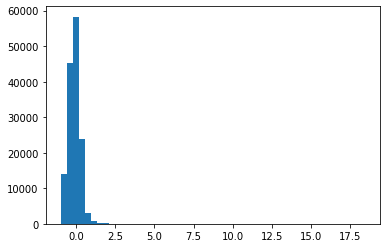

In [526]:
#Lets look at the distribution of demand
temp = bounded_df[bounded_df.DEMAND>=-1000000]['DEMAND'].values
plt.hist(temp,bins=50)

For further verification of demand lets compare it to CDU.

In [527]:
#Lets see how many nans are in data
l = len(bounded_df.dropna(axis=0,subset=['CDU']))
print('Number of non nan observations = {} with non-nan observation percentage = {}%'\
      .format(l,(l*100)/len(bounded_df)))

Number of non nan observations = 144717 with non-nan observation percentage = 99.29738371494638%


In [528]:
#Lets get a temporary df to work with
temp_df = bounded_df.dropna(axis=0,subset=['CDU'])

In [529]:
#First, need to redefine CDU_df as an ordinal encoding
CDU_df = temp_df.CDU
switcher  = {
    'EX' : 1,
    'VG' : 2,
    'GD' : 3,
    'AV' : 4,
    'FR' : 5,
    'PR' : 6,
    'VP' : 7,
    'UN' : 8
}

#Preallocating
temp = np.linspace(0,0,len(temp_df))
for i in range(len(temp_df)):
    temp[i] = switcher[CDU_df.iloc[i]]
    
#Redefining Dataframe
CDU_df = pd.DataFrame(temp,columns=['CDU'],index=temp_df.index)
temp_df.drop('CDU',axis=1,inplace=True)
temp_df = pd.concat([temp_df,CDU_df],axis=1)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(array([3.93000e+02, 1.82800e+03, 1.62000e+04, 1.07981e+05, 1.65220e+04,
        1.49200e+03, 2.03000e+02, 9.80000e+01]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

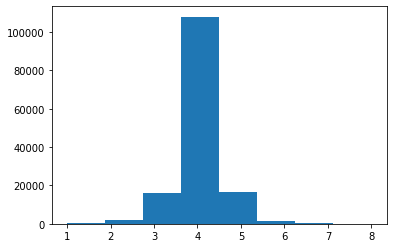

In [530]:
#Lets look at the distribution of values
plt.hist(CDU_df.values,bins=8)

So a key issue that needs to be thought about is that there are going to be alot of columns in a dataset if we try to look at too many features.  I shall attempt to combat this through the use of ordinal encoding, specifically based on ranking each feature value by demand.

In [531]:
for value in range(1,9):
    temp = np.sum(temp_df[temp_df.CDU == value]['DEMAND'])/len(temp_df[temp_df.CDU == value]['DEMAND'])
    print('Average Demand for CDU value {} is {}'.format(value,temp))

Average Demand for CDU value 1 is -0.05612467403334631
Average Demand for CDU value 2 is -0.03625013535238195
Average Demand for CDU value 3 is -0.09926790968781127
Average Demand for CDU value 4 is -0.12763323864565634
Average Demand for CDU value 5 is -0.0522014113445482
Average Demand for CDU value 6 is 0.11038145985280681
Average Demand for CDU value 7 is 0.12676893117954885
Average Demand for CDU value 8 is 0.2520372977292594


In [532]:
temp = pd.DataFrame(pd.concat([temp_df['DEMAND'],temp_df['CDU']],axis=1),columns = ['DEMAND','CDU'])
temp.corr()

,DEMAND,CDU
DEMAND,1.000000,0.042561
CDU,0.042561,1.000000


In [533]:
temp_df.corr()['SALEPRICE']

PROPERTYHOUSENUM      0.021379
PROPERTYZIP           0.008207
MUNICODE              0.130224
SCHOOLCODE           -0.063882
OWNERCODE             0.063809
USECODE               0.013161
LOTAREA               0.123566
SALEPRICE             1.000000
PREVSALEPRICE         0.570998
PREVSALEPRICE2        0.176414
COUNTYBUILDING        0.840273
COUNTYLAND            0.602817
COUNTYTOTAL           0.848371
COUNTYEXEMPTBLDG     -0.001241
LOCALBUILDING         0.839256
LOCALLAND             0.602615
LOCALTOTAL            0.846507
FAIRMARKETBUILDING    0.839255
FAIRMARKETLAND        0.602713
FAIRMARKETTOTAL       0.846303
STORIES               0.146698
YEARBLT               0.383467
EXTERIORFINISH        0.093087
ROOF                  0.041976
BASEMENT             -0.014046
CONDITION            -0.147040
TOTALROOMS            0.372519
BEDROOMS              0.348872
FULLBATHS             0.525236
HALFBATHS             0.371622
FIREPLACES            0.368137
BSMTGARAGE            0.247697
FINISHED

The results should above aren't promising as there appears to be no trend in "DEMAND" values and "CDU" values. With this in mind the model can use either "DEMAND", "CDU, or both; the distinction being that "DEMAND" isn't possibly as telling as we had hoped, otherwise it points to the CDU measure as having no effect on the "DEMAND" for a property.  Either way it doesn't point to confidence in this generated "Demand".

In [513]:
#Lets see how many nans are in data
l = len(bounded_df.dropna(axis=0,subset=['CONDITION']))
print('Number of non nan observations = {} with non-nan observation percentage = {}%'\
      .format(l,(l*100)/len(bounded_df)))

Number of non nan observations = 144709 with non-nan observation percentage = 99.29189452521939%
